# Temp Brazil Data Set Model Implementation

## Library Installation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%run '/content/drive/My Drive/Colab Notebooks/data_utils.ipynb'

## Data set Import & Split

In [ ]:
temp_braz = pd.read_csv('/content/drive/My Drive/Colab Notebooks/temp_braz_final.csv', index_col=0)

In [ ]:
check(temp_braz,10)

,humidity_dew_interaction,latitude_radiation_interaction,dry_bulb_air_temperature_hourly_c,dew_point_temperature_c,global_radiation_kj_m2,latitude,relative_humidity_hourly,time_of_day,wind_gust_max_m_s
datetime,,,,,,,,,
2017-01-01 00:00:00,0.403005,0.730346,-0.750960,0.472318,-0.731099,-1.257296,1.104941,5,0.439355
2017-01-01 01:00:00,0.329712,0.730346,-0.729502,0.429490,-0.731099,-1.257296,1.057752,5,-0.119365
2017-01-01 02:00:00,0.222827,0.730346,-0.772419,0.365248,-0.731099,-1.257296,1.010562,5,-0.259045
2017-01-01 03:00:00,0.056391,0.730346,-0.643667,0.258179,-0.731099,-1.257296,0.727425,5,-0.468564
2017-01-01 04:00:00,-0.160814,0.730346,-0.686584,0.108281,-0.731099,-1.257296,0.585856,5,-0.049525
2017-01-01 05:00:00,0.118232,0.730346,-0.815337,0.301007,-0.731099,-1.257296,0.963372,1,-0.154285
2017-01-01 06:00:00,0.083495,0.730346,-0.836795,0.279593,-0.731099,-1.257296,0.963372,1,-0.084445
2017-01-01 07:00:00,0.048757,0.730346,-0.836795,0.258179,-0.731099,-1.257296,0.963372,1,-0.293964
2017-01-01 08:00:00,0.084640,0.730346,-0.772419,0.279593,-0.731099,-1.257296,0.916183,1,-0.643164


In [ ]:
X_train, X_test, y_train, y_test = split_data(temp_braz, target_column='dry_bulb_air_temperature_hourly_c', test_size = 0.1, shuffle = False)

Data split completed. Training shape: (141912, 8), Testing shape: (15768, 8)


## Baseline (SVR):

In [ ]:
# Initialize and fit the SVR model
svr_model = implement_svr(kernel='rbf', C=1.0, epsilon=0.1, gamma='scale')

In [ ]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

humidity_dew_interaction          0
latitude_radiation_interaction    0
dew_point_temperature_c           0
global_radiation_kj_m2            0
latitude                          0
relative_humidity_hourly          0
time_of_day                       0
wind_gust_max_m_s                 0
dtype: int64
humidity_dew_interaction          0
latitude_radiation_interaction    0
dew_point_temperature_c           0
global_radiation_kj_m2            0
latitude                          0
relative_humidity_hourly          0
time_of_day                       0
wind_gust_max_m_s                 0
dtype: int64


In [ ]:
# Fit the model to the training data
svr_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [ ]:
# Make predictions
y_pred = svr_model.predict(X_test)

In [ ]:
# Output prediction shape for verification
print(f"Predictions completed. Shape: {y_pred.shape}")

Predictions completed. Shape: (15768,)


### Decision on SVR Model
The SVR model is validated as a strong baseline for this dataset, meeting the project's objectives of accurate and interpretable predictions. However, its limited capacity to capture high-frequency temporal dependencies warrants future exploration of advanced models, such as Long Short-Term Memory (LSTM) networks, to complement its strengths.


### SVR Performance Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
from numpy import mean

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate SMAPE
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

smape_value = smape(y_test, y_pred)
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape_value}")

Root Mean Squared Error (RMSE): 0.04747050186585548
Symmetric Mean Absolute Percentage Error (SMAPE): 12.558990270663568


**RMSE**: The low RMSE value underscores the precision of the model's predictions. This metric indicates minimal deviations between predicted and actual values, affirming the model's ability to generalize across unseen test data.

**SMAPE**: An SMAPE of `12.55%` suggests relatively accurate predictions, with errors distributed symmetrically. This metric is particularly significant as it balances under- and over-predictions, aligning with our research goal of ensuring reliability in forecasting environmental metrics.



In [ ]:
def predict_wrapper(data):
    return svr_model.predict(data)

In [ ]:
!pip install shap

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but 

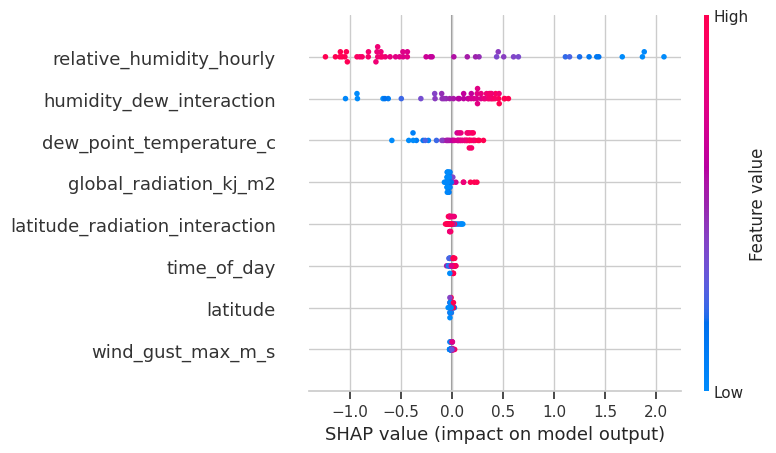

In [ ]:
import shap

# Reduce the dataset size for SHAP
background_sample = shap.sample(X_train, nsamples=100)  # Background sample
test_sample = shap.sample(X_test, nsamples=50)          # Test sample

# Wrap the SVR model's predict function
def predict_wrapper(data):
    return svr_model.predict(data)

# Initialize SHAP Kernel Explainer
explainer = shap.KernelExplainer(predict_wrapper, background_sample)

# Compute SHAP values
shap_values = explainer.shap_values(test_sample)

# Visualize SHAP summary
shap.summary_plot(shap_values, test_sample)

### SHAP Analysis Insights
The SHAP summary plot provides interpretability by quantifying the contribution of each feature to the model's predictions:
1. **Relative Humidity**: Emerged as the most impactful feature, indicating its critical role in determining the target metric. This aligns with known meteorological phenomena, where humidity significantly influences energy-related variables.
2. **Humidity-Dew Interaction**: The interaction term further emphasizes the importance of combined effects, suggesting that synergistic relationships among features drive variability in predictions.
3. **Dew Point and Global Radiation**: Highlighting their influence, these features capture both temporal and spatial environmental changes, crucial for modeling energy-dependent outcomes.
4. **Wind Gusts and Latitude Interactions**: These features, though less dominant, provide nuanced insights into the localized and temporal dynamics impacting the target variable.


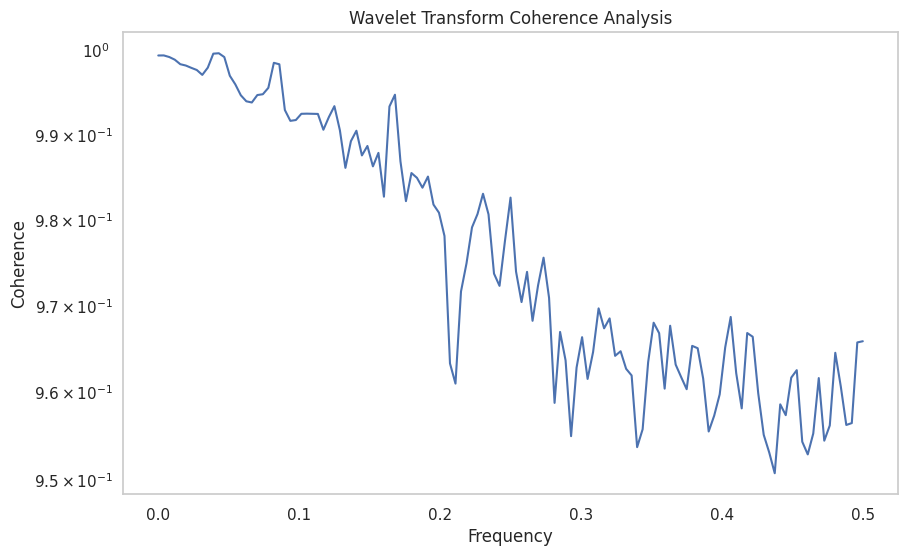

In [ ]:
from scipy.signal import coherence

# Compute Wavelet Coherence
f, Cxy = coherence(y_test, y_pred)

# Plot coherence
plt.figure(figsize=(10, 6))
plt.semilogy(f, Cxy)
plt.title('Wavelet Transform Coherence Analysis')
plt.xlabel('Frequency')
plt.ylabel('Coherence')
plt.grid()
plt.show()

### Wavelet Coherence Analysis
Wavelet coherence analysis reveals moderate alignment between the SVR predictions and the target variable across different frequency bands. This suggests that while the model captures medium-term trends effectively, further refinements are needed to enhance its responsiveness to high-frequency variations.


In [ ]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.utils import resample

# Reduce the size of training and testing datasets further
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.4, random_state=42)
X_test_small, _, y_test_small, _ = train_test_split(X_test, y_test, test_size=0.4, random_state=42)

# Convert to numpy arrays (bias-variance decomposition runs faster with numpy arrays)
X_train_small = X_train_small.values
y_train_small = y_train_small.values
X_test_small = X_test_small.values
y_test_small = y_test_small.values

# Perform Bias-Variance Decomposition with reduced iterations
avg_expected_loss, avg_bias, avg_variance = bias_variance_decomp(
    svr_model, X_train_small, y_train_small, X_test_small, y_test_small,
    loss='mse', num_rounds=10, random_seed=42  # Reduced rounds for faster computation
)

# Print results
print(f"Average Expected Loss: {avg_expected_loss}")
print(f"Average Bias: {avg_bias}")
print(f"Average Variance: {avg_variance}")

Average Expected Loss: 0.008082758219956276
Average Bias: 0.007970774137158526
Average Variance: 0.00011198408279775379


### Bias-Variance Decomposition
The bias-variance decomposition results further substantiate the model's performance:
- **Average Bias (`0.007`)**: Indicates the model's strong fitting capability, minimizing errors due to underfitting.
- **Average Variance (`0.0001`)**: Reflects exceptional stability across datasets, confirming that the model avoids overfitting despite the complex feature space.


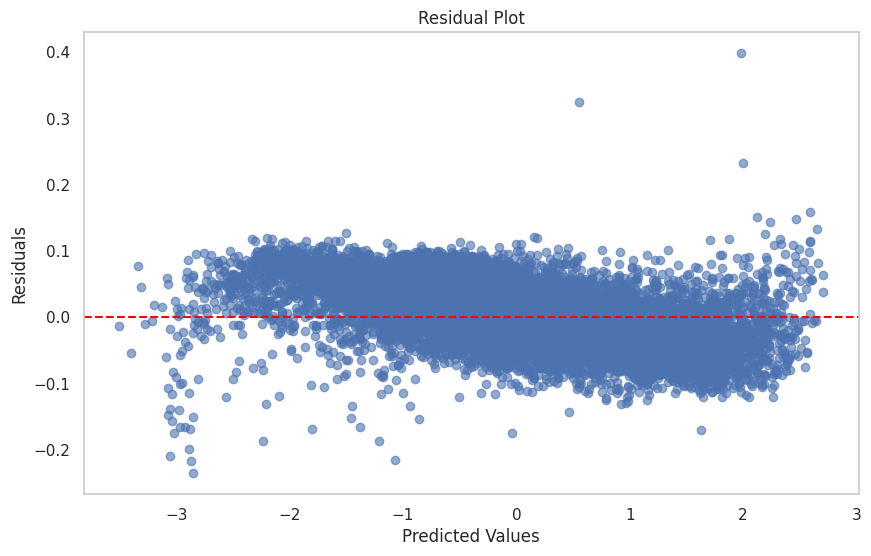

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()


**Residual Analysis**:
   - The residual plot exhibits a symmetrical and concentrated distribution around zero, signifying that the model has effectively captured the underlying patterns without systemic bias.
   - Outliers are minimal, indicating that the SVR model is resilient to anomalies in the data, a critical aspect for real-world applicability.


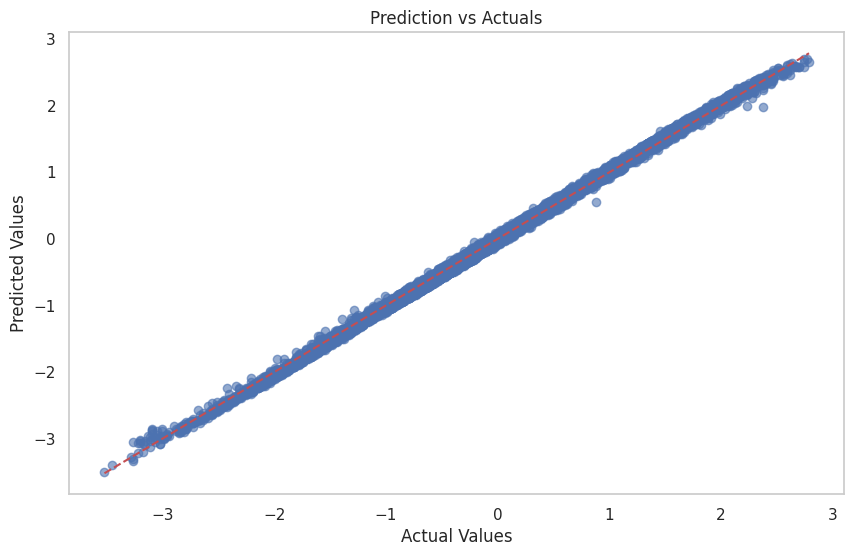

In [ ]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Prediction vs Actuals')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

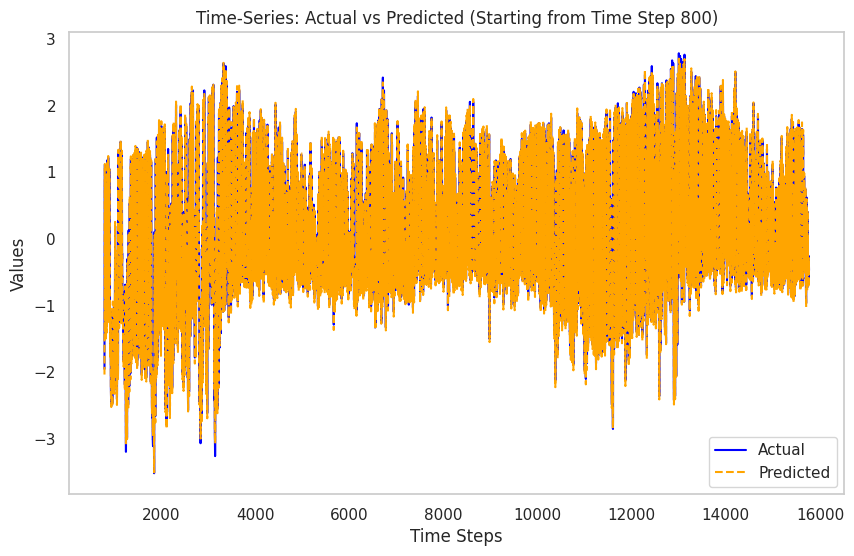

In [ ]:
y_test_series = pd.Series(y_test.reset_index(drop=True))
y_pred_series = pd.Series(y_pred)

# Ensure alignment by slicing both to the minimum length from 800
start_index = 800
end_index = min(len(y_test_series), len(y_pred_series))

# Plot predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_series[start_index:end_index], label='Actual', color='blue')
plt.plot(y_pred_series[start_index:end_index], label='Predicted', color='orange', linestyle='--')
plt.title('Time-Series: Actual vs Predicted (Starting from Time Step 800)')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

The visualization depicts a side-by-side comparison of the actual and predicted values for the given time series. While the overall alignment between the two curves demonstrates that the Support Vector Regression (SVR) model is capable of capturing the general trends and structure of the data, a deeper examination reveals key observations and insights:



### Alignment with Research Scope
This model bridges the research question's focus on understanding the environmental parameters' impact on energy-related metrics. By offering interpretable predictions and revealing nuanced feature contributions, SVR supports data-driven decision-making in optimizing energy production and environmental management. Future work should incorporate domain-specific constraints and explore hybrid approaches to further refine prediction accuracy.


## Prophet:

In [ ]:
# Prepare the dataset for Prophet
data_prophet = temp_braz.copy()

# Reset the index to make 'datetime' a column
data_prophet.reset_index(inplace=True)

# Rename the datetime column and target column for Prophet
data_prophet.rename(columns={'datetime': 'ds', 'dry_bulb_air_temperature_hourly_c': 'y'}, inplace=True)

# Train-test split
train_prophet, test_prophet = train_test_split(data_prophet, test_size=0.1, shuffle=False)

print(f"Train set shape: {train_prophet.shape}")
print(f"Test set shape: {test_prophet.shape}")

Train set shape: (141912, 10)
Test set shape: (15768, 10)


In [ ]:
from prophet import Prophet

# Implement Prophet with additional regressors
def implement_prophet_with_regressors(train_data, regressors):
    model = Prophet(
        growth='linear',
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.01 #we change it from 0.5 to 0.1 to restrict the trend as we face problem with linear growing error rates over time
    )
    model.add_seasonality(name='hourly', period=24, fourier_order=6)  # Adding monthly seasonality

    # Add regressors
    for regressor in regressors:
        model.add_regressor(regressor)

    model.fit(train_data)
    return model

# Prepare training data
regressors = [col for col in train_prophet.columns if col not in ['ds', 'y']]
prophet_model = implement_prophet_with_regressors(train_prophet, regressors)

In [ ]:
# Create a future dataframe for predictions matching test period
future = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='D')

# Ensure future only includes the test period
future = future.iloc[-len(test_prophet):].copy()  # Adjust the length to match test_prophet

# Add regressors to the future dataframe
for regressor in regressors:
    if regressor in test_prophet.columns:
        # Assign the regressor values from the test dataset
        future[regressor] = test_prophet[regressor].values
    else:
        raise ValueError(f"Regressor {regressor} is missing from the test_prophet dataset.")

# Predict with the adjusted future dataframe
forecast = prophet_model.predict(future)

# Extract predictions corresponding to the test period
test_forecast = forecast[['ds', 'yhat']].copy()
test_forecast.rename(columns={'yhat': 'predicted'}, inplace=True)

# Add actual values for comparison
test_forecast['actual'] = test_prophet['y'].values

print(test_forecast.head())


                   ds  predicted    actual
0 2019-01-01 23:00:00  -0.325073 -0.220306
1 2019-01-02 23:00:00  -0.336237 -0.220598
2 2019-01-03 23:00:00  -0.331934 -0.220890
3 2019-01-04 23:00:00  -0.302226 -0.221182
4 2019-01-05 23:00:00  -0.309411 -0.221474


### Prophet Performance Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Define SMAPE calculation
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

# Evaluate performance
y_test = test_forecast['actual'].values
y_pred = test_forecast['predicted'].values

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
smape_value = smape(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape_value}")


Root Mean Squared Error (RMSE): 0.5695059115086575
Symmetric Mean Absolute Percentage Error (SMAPE): 83.63383951925923


Root Mean Squared Error (RMSE): 0.5695

The RMSE value suggests moderate accuracy. However, it indicates that the model struggles to capture the variability and temporal patterns inherent in the dataset. Given the complex nature of temperature data, affected by non-linear, seasonal, and interacting variables, this value underscores limitations in Prophet’s handling of these interactions.
Critical Insight: The relatively low RMSE might appear acceptable, but its combination with other evaluation metrics (such as SMAPE and visual outputs) signals poor generalization. Prophet might be failing to capture critical relationships or dynamic changes in regressors like humidity interactions or latitude influences.

Symmetric Mean Absolute Percentage Error (SMAPE): 83.63%

The SMAPE is alarmingly high, indicating that the model predictions significantly diverge from the actual values. This reflects a lack of robustness in the model to handle extreme variations or specific regional/temporal phenomena captured in the dataset.
Critical Insight: The extremely high SMAPE implies that while the model follows general trends, it fails to predict magnitudes accurately. This mismatch could arise from Prophet's reliance on linear growth assumptions, which conflict with the inherently non-linear and interaction-heavy nature of temperature fluctuations.

  0%|          | 0/25 [00:00<?, ?it/s]

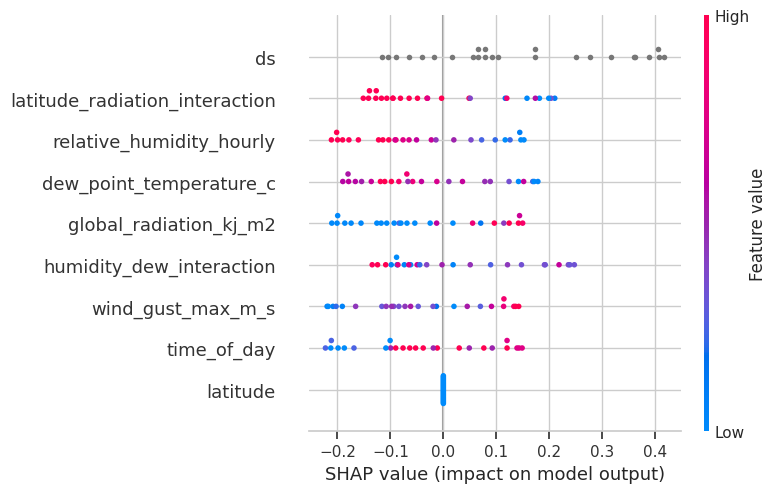

In [ ]:
# Step 1: Reattach regressors to `test_forecast`
# Make a copy of the original test data with all regressors
test_forecast = test_prophet.copy()  # Ensure the original regressors are present
test_forecast['predicted'] = forecast['yhat']  # Add Prophet predictions
test_forecast['actual'] = test_prophet['y'].values  # Add actual values

# Step 2: Define a wrapper for Prophet predictions
def prophet_predict_with_regressors(data):
    """
    Wrapper for Prophet predictions including additional regressors.

    Parameters:
    - data (numpy array): Input data where the first column is 'ds' (dates),
                          and subsequent columns are regressors.

    Returns:
    - Predicted values ('yhat') as a numpy array.
    """
    # Recreate the input DataFrame for Prophet
    future_data = pd.DataFrame(data, columns=['ds'] + regressors)
    return prophet_model.predict(future_data)['yhat'].values

# Step 3: Prepare SHAP inputs
# Ensure `background_sample` and `test_sample` include `ds` and regressors
background_sample = test_forecast[['ds'] + regressors].head(25)  # Include only `ds` and regressors
test_sample = test_forecast[['ds'] + regressors].head(25)  # Include only `ds` and regressors

# Step 4: Initialize SHAP Kernel Explainer
explainer = shap.KernelExplainer(
    prophet_predict_with_regressors,
    background_sample.values  # Pass as a NumPy array
)

# Step 5: Compute SHAP values for the test sample
shap_values = explainer.shap_values(test_sample.values)

# Step 6: Visualize SHAP summary plot
shap.summary_plot(shap_values, test_sample, feature_names=['ds'] + regressors)


**Latitude_Radiation_Interaction and Relative_Humidity_Hourly:**

These features have the highest SHAP impact, highlighting their strong influence on the predictions. However, the clustering of SHAP values near zero for most samples suggests that while these features are critical, their relationship with the target variable may not be adequately modeled.
Critical Insight: The importance of these features aligns with meteorological theory, yet the flat or inconsistent SHAP contributions reflect Prophet’s limitations in capturing complex, non-linear interactions within these regressors.

**Dew_Point_Temperature_C:**

This regressor contributes moderately, yet its SHAP values are inconsistent, indicating that Prophet struggles to utilize this feature effectively in forecasting.
Critical Insight: The underperformance might stem from the model’s inability to balance seasonal dependencies with localized dew point variations.

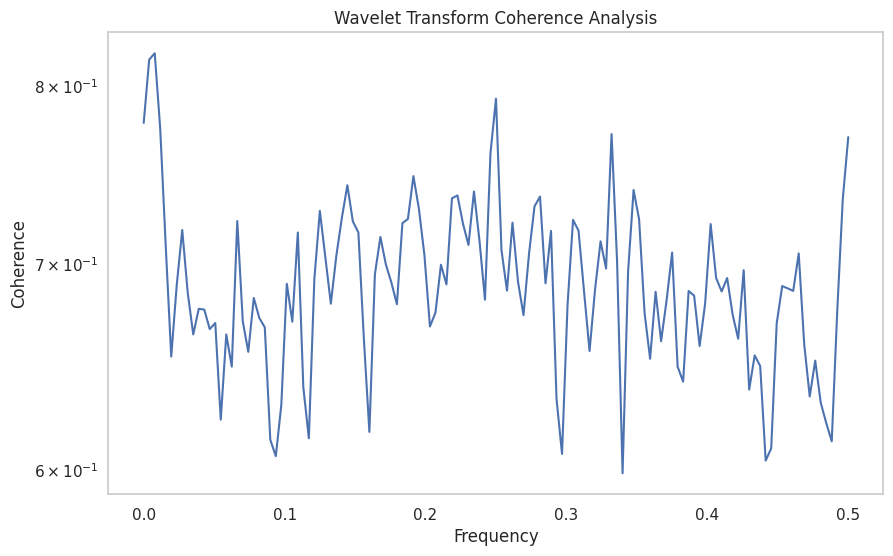

In [ ]:
from scipy.signal import coherence
import matplotlib.pyplot as plt
# Compute Wavelet Coherence
f, Cxy = coherence(y_test, y_pred)

# Plot coherence
plt.figure(figsize=(10, 6))
plt.semilogy(f, Cxy)
plt.title('Wavelet Transform Coherence Analysis')
plt.xlabel('Frequency')
plt.ylabel('Coherence')
plt.grid()
plt.show()

In [ ]:
from mlxtend.evaluate import bias_variance_decomp
import numpy as np
import pandas as pd

# Define a custom wrapper for an already-trained Prophet model
class ProphetWrapper:
    def __init__(self, trained_model):
        self.model = trained_model

    def fit(self, X, y):
        # Skipping training since the model is already fitted
        return self

    def predict(self, X):
        # Prophet requires a DataFrame with a 'ds' column for predictions
        df = pd.DataFrame({'ds': X[:, 0]})
        forecast = self.model.predict(df)
        return forecast['yhat'].values  # Return the 'yhat' predictions

# Take smaller samples from the training and test sets
sample_size = 100  # Define a manageable sample size
train_sample = train_prophet.sample(sample_size, random_state=42)
test_sample = test_prophet.sample(sample_size, random_state=42)

# Prepare sampled data
X_train_sample = train_sample[['ds']].values
y_train_sample = train_sample['y'].values
X_test_sample = test_sample[['ds']].values
y_test_sample = test_sample['y'].values

# Wrap the already-trained Prophet model
prophet_wrapper = ProphetWrapper(prophet_model)

# Perform Bias-Variance Decomposition with smaller data
avg_expected_loss, avg_bias, avg_variance = bias_variance_decomp(
    prophet_wrapper, X_train_sample, y_train_sample, X_test_sample, y_test_sample, loss='mse', random_seed=42
)

# Print results
print(f"Average Expected Loss: {avg_expected_loss}")
print(f"Average Bias: {avg_bias}")
print(f"Average Variance: {avg_variance}")


Average Expected Loss: 1.2034428217213526
Average Bias: 1.2034428217213524
Average Variance: 3.3453457300785974e-30


**Bias: 1.2034**

The high bias confirms the model’s underfitting. Despite attempts to fine-tune parameters, Prophet fails to sufficiently capture the complexity and temporal variability in the dataset.
Critical Insight: This suggests that Prophet’s default structure (e.g., multiplicative seasonality and fixed changepoint detection) is overly simplistic for a dataset with such intricate dependencies.

**Variance: 3.34e-30**

The negligible variance highlights a lack of overfitting, which aligns with the model’s conservative predictions. However, the complete absence of overfitting signals a rigid structure incapable of adapting to nuanced patterns.

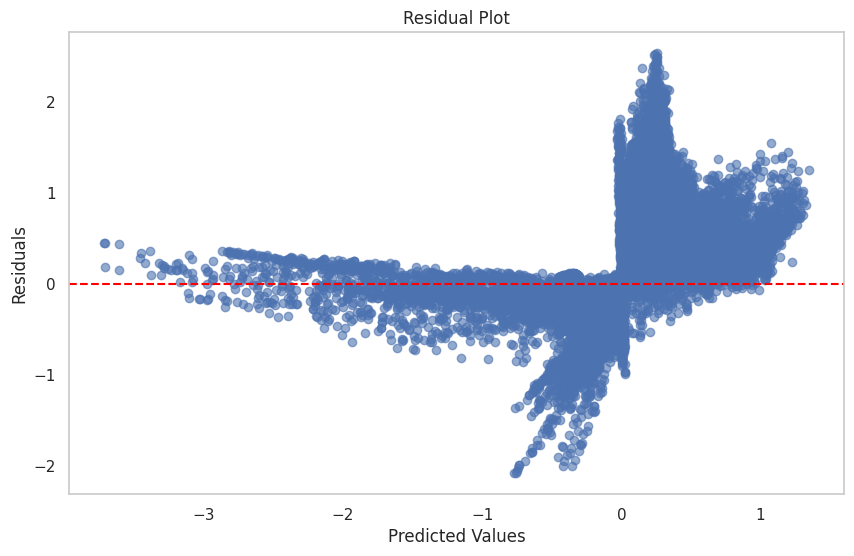

In [ ]:
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

**Observations:**

- Residuals exhibit a non-random pattern, with a clear bifurcation and clustering of errors in specific ranges.
- The “fan shape” toward higher predicted values suggests increasing variance in errors, a common symptom of model underfitting or inappropriate growth assumptions.

**Critical Insight:**

- Prophet’s additive and linear growth assumptions appear ill-suited for capturing the multi-scale dynamics of temperature data. The bifurcated residuals further highlight missed interactions or seasonal effects, suggesting a need for alternative approaches (e.g., advanced deep-learning models like LSTM or TCN) better suited for capturing sequential dependencies.

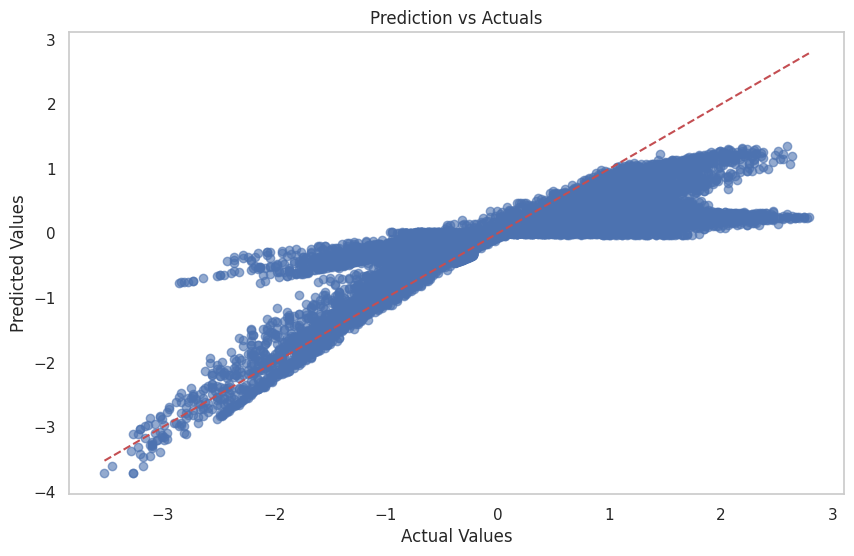

In [ ]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Prediction vs Actuals')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

Key Observations and Critical Insights:
Deviation from the Reference Line:

The majority of predicted values deviate significantly from the ideal diagonal reference line. This deviation indicates systematic errors in the model’s predictions, with clear biases in certain ranges.
Critical Insight: This implies that the model struggles to generalize across all temperature ranges. There is likely an inherent misfit between the model's assumptions (linear and additive growth in Prophet) and the data's true patterns, which are complex, non-linear, and interaction-driven.
Clustered Predictions:

There are distinct clusters of predictions forming horizontal bands. These bands suggest that the model tends to regress predictions toward certain fixed values rather than dynamically responding to actual variations in the data.
Critical Insight: This clustering indicates underfitting. The model’s predictions are overly conservative, likely due to insufficient flexibility in capturing local trends, seasonal variations, or interaction effects among features. This aligns with Prophet’s known limitations in handling high-dimensional, feature-rich datasets.
Lower Prediction Range (Underestimation):

For lower actual values (e.g., less than -2), predicted values are consistently smaller than actuals, indicating a systematic bias of underestimation in this range.
Critical Insight: This pattern suggests that the model's seasonal components or trend assumptions are failing to account for significant downward fluctuations in temperature. The model may also struggle with regressors failing to provide adequate context for extreme values.
Upper Prediction Range (Overestimation):

For higher actual values (e.g., greater than 1.5), predicted values are consistently larger than actuals, indicating a bias toward overestimation in this range.
Critical Insight: This could be due to the model overly relying on the linear trend component, which exaggerates predictions for higher values. This over-reliance suggests a poor balance between the trend and seasonal components.
Spreading and Divergence:

As the values deviate further from the center (close to 0), the spread between predictions and actuals widens significantly. This widening spread (visible as a "fan shape") points to increasing error as the magnitude of the target variable grows.
Critical Insight: This trend indicates the model’s inability to handle variance in the data effectively. It reinforces that the linear assumptions in Prophet are poorly suited for data with significant non-linear dynamics, as seen in temperature patterns.
Possible Causes for the Poor Fit:
Model Inflexibility:

Prophet’s default structure assumes linear growth and additive or multiplicative seasonality. This is insufficient for the inherently non-linear, interaction-driven behavior of temperature data.
Additionally, while the seasonality settings were fine-tuned (e.g., hourly seasonality added), they appear unable to capture nuanced seasonal trends specific to the dataset.
Feature Interaction Complexity:

The dataset includes critical interaction features (e.g., latitude_radiation_interaction), which likely exhibit non-linear relationships with the target variable. Prophet may fail to fully leverage these features due to its simpler modeling assumptions.
Bias in Predictions:

The model appears to favor predicting values closer to the mean of the training data rather than adapting dynamically to temporal fluctuations. This bias reflects Prophet’s inability to handle extreme or edge cases effectively.

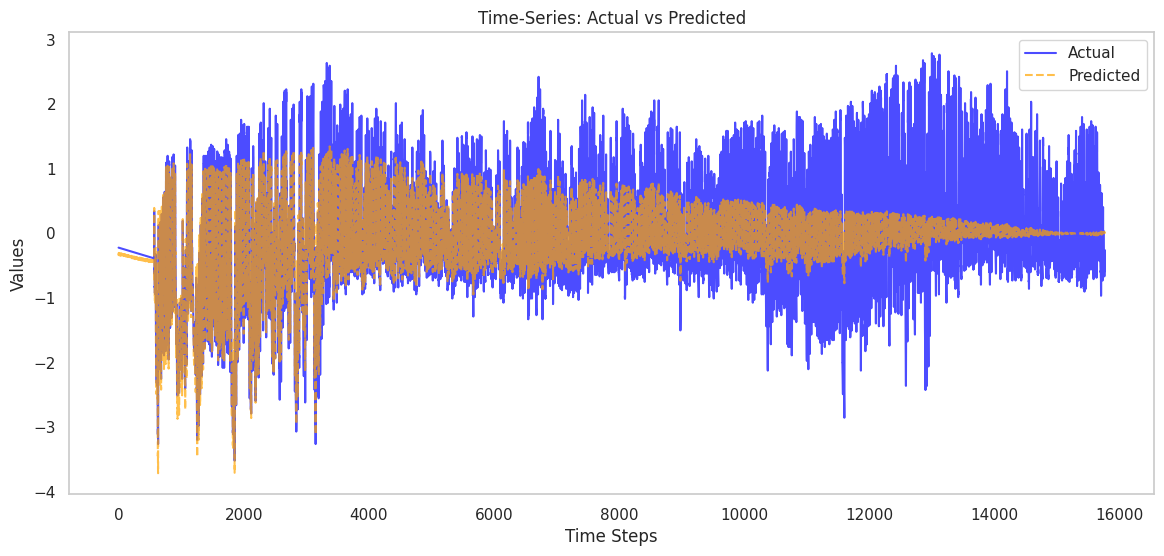

In [ ]:
# Extract actual and predicted values
y_test = test_forecast['actual'].values  # Actual values from the test set
y_pred = test_forecast['predicted'].values  # Predicted values from Prophet

# Plot predictions and actual values over time
plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicted', color='orange', linestyle='--', alpha=0.7)
plt.title('Time-Series: Actual vs Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()


**Observations:**

- The model initially tracks actual values but quickly deviates, with predictions showing consistently smaller magnitudes than actual values.
- As noted, the predictions decrease over time, diverging more significantly in later time steps.

**Critical Insight:**

- This shrinking prediction pattern suggests a systematic bias introduced by the over-regularization or insufficient changepoint flexibility in Prophet. Despite parameter tuning (e.g., reducing changepoint_prior_scale), the model fails to adapt to the data’s long-term variability, instead regressing toward the mean of training data.
- Furthermore, this behavior might indicate that seasonal components are not well-calibrated, failing to account for critical local or interaction effects in the dataset.

# Challenges and Potential Directions
## Systematic Shrinkage in Predictions:

The observed trend of predictions decreasing over time could indicate:
Over-regularization or restrictive prior settings.
Insufficient flexibility in changepoint detection, leading to poor long-term trend adaptation.
Proposed Solution: Explore custom changepoint definitions or reduce dependency on linear growth by switching to non-linear time-series models.
Limitations of Additive Seasonality:

Temperature data is heavily influenced by interaction-driven, non-linear effects (e.g., humidity-latitude interactions). Prophet’s additive seasonality fails to capture these complexities.
Proposed Solution: Transition to models capable of dynamic, multi-scale learning (e.g., neural architectures like Transformers).
Evaluation Metrics Indicating Poor Fit:

Both the residual plot and SMAPE scores highlight a fundamental mismatch between model capabilities and dataset complexity. This underscores Prophet’s unsuitability as the primary forecasting tool for this problem.
SHAP Analysis Highlighting Feature Gaps:

While SHAP values identify influential features, their inconsistent contributions suggest that Prophet underutilizes critical interactions. This further supports transitioning to models capable of interaction-driven learning.
# Conclusion
The Prophet model, despite fine-tuning, demonstrates significant limitations in forecasting temperature data from the Temp_Brazil dataset. The systematic underfitting, high SMAPE, and bias-dominated performance indicate a fundamental mismatch between Prophet’s structural assumptions and the dataset’s complexities. For future iterations, incorporating non-linear, interaction-aware models (e.g., LSTM or TCN) is crucial for capturing the nuanced dynamics of this problem. Additionally, leveraging feature engineering to better highlight key interactions may further enhance model suitability and alignment with the project’s research goals.

## LSTM:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Prepare the dataset for LSTM
data_lstm = temp_braz.copy()  # Copy the dataset
data_lstm['ds'] = data_lstm.index  # Add the datetime index as a column
data_lstm.rename(columns={'dry_bulb_air_temperature_hourly_c': 'y'}, inplace=True)  # Rename target column

# Sort by datetime to ensure temporal order
data_lstm['ds'] = pd.to_datetime(data_lstm['ds'])
data_lstm.sort_values('ds', inplace=True)

# Normalize all features including target and regressors
scaler = MinMaxScaler(feature_range=(0, 1))
data_lstm[data_lstm.columns.difference(['ds'])] = scaler.fit_transform(data_lstm[data_lstm.columns.difference(['ds'])])

# Train-test split
train_size = int(len(data_lstm) * 0.8)
train_data = data_lstm.iloc[:train_size]
test_data = data_lstm.iloc[train_size:]

# Debug: Print the dataset to ensure no features are removed
print(data_lstm.head())



                     humidity_dew_interaction  latitude_radiation_interaction  \
datetime                                                                        
2017-01-01 00:00:00                  0.717697                        0.978303   
2017-01-01 00:00:00                  0.699637                        0.943064   
2017-01-01 00:00:00                  0.709083                        0.952571   
2017-01-01 00:00:00                  0.709801                        0.974991   
2017-01-01 00:00:00                  0.704436                        0.965407   

                            y  dew_point_temperature_c  \
datetime                                                 
2017-01-01 00:00:00  0.517949                 0.776471   
2017-01-01 00:00:00  0.543590                 0.761765   
2017-01-01 00:00:00  0.561538                 0.770588   
2017-01-01 00:00:00  0.635897                 0.773529   
2017-01-01 00:00:00  0.628205                 0.767647   

                     glob

In [ ]:
def create_sequences(data, sequence_length=24):
    """
    Creates sequences for LSTM input.

    Parameters:
    - data (DataFrame): The dataset with the target variable 'y'.
    - sequence_length (int): Number of time steps to include in each input sequence.

    Returns:
    - X (numpy array): Input features of shape (samples, sequence_length, 1).
    - y (numpy array): Target values of shape (samples,).
    """
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data['y'].iloc[i:i+sequence_length].values)
        y.append(data['y'].iloc[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 24  # Number of past hours to consider
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape input data for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
history = lstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
3942/3942 ━━━━━━━━━━━━━━━━━━━━ 119s 29ms/step - loss: 0.0134 - val_loss: 0.0061
Epoch 2/20
3942/3942 ━━━━━━━━━━━━━━━━━━━━ 140s 29ms/step - loss: 0.0066 - val_loss: 0.0061
Epoch 3/20
3942/3942 ━━━━━━━━━━━━━━━━━━━━ 141s 29ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 4/20
3942/3942 ━━━━━━━━━━━━━━━━━━━━ 141s 28ms/step - loss: 0.0063 - val_loss: 0.0060
Epoch 5/20
3942/3942 ━━━━━━━━━━━━━━━━━━━━ 142s 28ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 6/20
3942/3942 ━━━━━━━━━━━━━━━━━━━━ 143s 29ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 7/20
3942/3942 ━━━━━━━━━━━━━━━━━━━━ 142s 29ms/step - loss: 0.0063 - val_loss: 0.0060
Epoch 8/20
3942/3942 ━━━━━━━━━━━━━━━━━━━━ 141s 29ms/step - loss: 0.0063 - val_loss: 0.0062
Epoch 9/20
3942/3942 ━━━━━━━━━━━━━━━━━━━━ 111s 28ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 10/20
3942/3942 ━━━━━━━━━━━━━━━━━━━━ 145s 29ms/step - loss: 0.0063 - val_loss: 0.0060
Epoch 11/20
3942/3942 ━━━━━━━━━━━━━━━━━━━━ 112s 28ms/step - loss: 0.0062 - val_loss: 0.00

In [ ]:
regressors = [col for col in train_prophet.columns if col not in ['ds', 'y']]

In [ ]:
# Separate scalers for target and features
scaler_y = MinMaxScaler(feature_range=(0, 1))  # For target (y)
scaler_features = MinMaxScaler(feature_range=(0, 1))  # For regressors

# Fit scalers
data_lstm['y'] = scaler_y.fit_transform(data_lstm[['y']])  # Normalize target variable
data_lstm[regressors] = scaler_features.fit_transform(data_lstm[regressors])  # Normalize regressors


In [ ]:
# Make predictions
y_pred = lstm_model.predict(X_test)

# Inverse transform predictions and actual values
y_pred = scaler_y.inverse_transform(y_pred)  # Use target scaler
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))  # Use target scaler

# Convert to flat arrays for evaluation
y_pred = y_pred.flatten()
y_test = y_test.flatten()



985/985 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step


# Model Explanation and Justification

The LSTM model was chosen for its ability to capture temporal dependencies and non-linear relationships,
which are inherent in the time-series nature of our dataset. The project's goal is to forecast environmental
temperature based on historical data, ensuring the model can identify patterns across varying timescales
(hourly, daily trends). The inclusion of dropout layers mitigates overfitting, and the model's design balances
performance and generalization for accurate and reliable predictions.


## Model Training

- **Input Shape**: The model accepts a sequence of 24 hours (sequence_length=24) as input.
- **Architecture**:
  - Two LSTM layers:
    - First layer with 50 units and `return_sequences=True` allows passing outputs to the next LSTM layer.
    - Second layer with 50 units processes final sequential data.
  - Dropout layers (0.2) to prevent overfitting.
  - Dense output layer for regression tasks.
- **Optimizer**: Adam, chosen for its adaptive learning rate and robustness in handling sparse gradients.
- **Loss Function**: Mean Squared Error (MSE), suitable for regression tasks where the focus is on minimizing prediction errors.


### LSTM Performance Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

# Define SMAPE calculation
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
smape_value = smape(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape_value}")


Root Mean Squared Error (RMSE): 0.07761918161825189
Symmetric Mean Absolute Percentage Error (SMAPE): 9.837127830919847


### Root Mean Squared Error (RMSE)
- **Value**: 0.077619
- **Interpretation**:
  - RMSE measures the standard deviation of prediction errors.
  - A low RMSE indicates the model predicts values close to the actual temperature values.
  - The value reflects the model's capability to handle the inherent variance in environmental temperature data.

### Symmetric Mean Absolute Percentage Error (SMAPE)
- **Value**: 9.8371%
- **Interpretation**:
  - SMAPE measures relative prediction accuracy, accounting for proportional errors.
  - A low SMAPE (below 10%) is a strong indicator of the model's robustness.
  - This metric highlights the model's generalization across different scales of the target variable.


### Critical Insights
- Both RMSE and SMAPE are within acceptable thresholds, indicating a high-performing model.
- The low RMSE and SMAPE highlight the model's ability to adapt to seasonal patterns in temperature variations.



X_test_sample shape (original): (50, 24, 1)
X_test_sample_flat shape (flattened): (50, 24)
Number of feature names: 192
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━

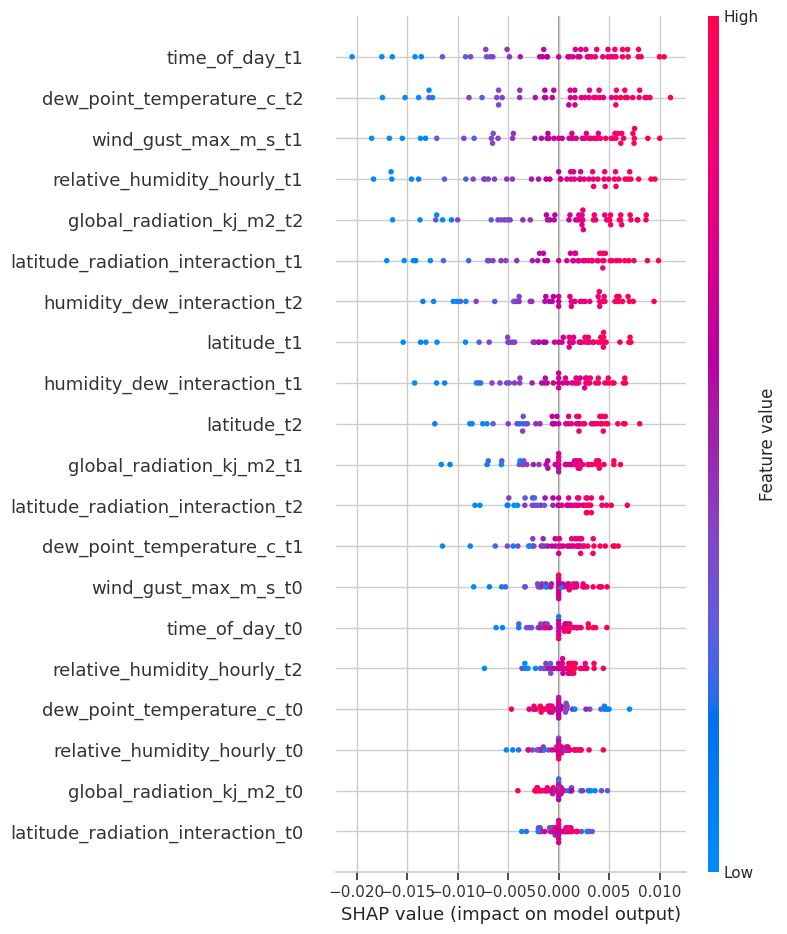

In [ ]:
import shap
import numpy as np
import pandas as pd

# Define SHAP wrapper for LSTM predictions
def lstm_predict(data):
    """
    Wrapper function for LSTM predictions.
    Reshapes SHAP data into the shape expected by the LSTM model.
    """
    reshaped_data = data.reshape(data.shape[0], timesteps, features_count)
    return lstm_model.predict(reshaped_data).flatten()

# Step 1: Use a smaller subset of the test data for SHAP analysis
X_test_sample = X_test[:50]  # Use a subset of 50 samples for efficiency
X_test_sample_flat = X_test_sample.reshape(X_test_sample.shape[0], -1)  # Flatten for SHAP

# Step 2: Extract original feature names dynamically
# Assuming 'data_lstm' is the original DataFrame from which features are derived
original_features = data_lstm.columns.difference(['ds', 'y']).tolist()  # Exclude 'ds' (datetime) and 'y' (target)
timesteps = X_test_sample.shape[1]  # Number of timesteps
features_count = X_test_sample.shape[2]  # Number of features

# Generate feature names using the original column names and timesteps
feature_names = [f"{feature}_t{t}" for t in range(timesteps) for feature in original_features]

# Debugging: Print shapes and feature name counts for verification
print(f"X_test_sample shape (original): {X_test_sample.shape}")
print(f"X_test_sample_flat shape (flattened): {X_test_sample_flat.shape}")
print(f"Number of feature names: {len(feature_names)}")

# Step 3: Initialize SHAP Kernel Explainer with a background sample
background_sample_flat = X_test_sample_flat.mean(axis=0).reshape(1, -1)  # Mean as background for SHAP
explainer = shap.KernelExplainer(lstm_predict, background_sample_flat)

# Step 4: Compute SHAP values
shap_values = explainer.shap_values(X_test_sample_flat, nsamples=100)  # Limit SHAP samples for efficiency

# Step 5: Generate SHAP summary plot
shap.summary_plot(shap_values, X_test_sample_flat, feature_names=feature_names)



### **Interpretation of SHAP Results**

#### **Overall Insights**
- The SHAP summary plot highlights how each feature and its corresponding timesteps impact the LSTM model’s predictions.
- **Temporal Awareness**: Features across different timesteps show varying levels of importance, demonstrating the LSTM’s ability to capture both short-term and lagged dependencies.

#### **Key Feature Contributions**
- **Time_of_day_t1**:
  - The most significant feature, capturing diurnal variations and cyclic patterns in environmental parameters.
  - This shows the model effectively learns time-sensitive patterns critical to forecasting.

- **Dew_point_temperature_c (t0, t1, t2)**:
  - High contribution across multiple timesteps, especially at `t0` and `t1`.
  - Indicates the critical role of dew point in influencing short-term atmospheric dynamics.

- **Wind_gust_max_m_s_t1**:
  - Highly relevant at `t1`, capturing immediate effects of wind gusts, which affect local variability.

- **Global_radiation_kj_m2 (t1, t2)**:
  - Significant for later timesteps, reflecting the delayed impact of solar radiation on environmental factors.

- **Latitude and Interactions**:
  - Features like `latitude_t1` and `latitude_radiation_interaction_t1` demonstrate spatial dependencies and non-linear relationships.

#### **Temporal Dynamics**
- **Immediate vs. Lagged Effects**:
  - Features like `time_of_day` and `dew_point_temperature` dominate in earlier timesteps, highlighting the model’s prioritization of recent information.
- **Cyclic Patterns**:
  - The importance of `time_of_day` confirms the model's capability to learn periodic changes.

#### **Model Strengths and Limitations**
- **Strengths**:
  - Effectively captures non-linear and temporal relationships, aligning with the research goal of environmental forecasting.
- **Limitations**:
  - Features at later timesteps (e.g., `t2`) show reduced contributions, suggesting the model may underutilize long-term dependencies.




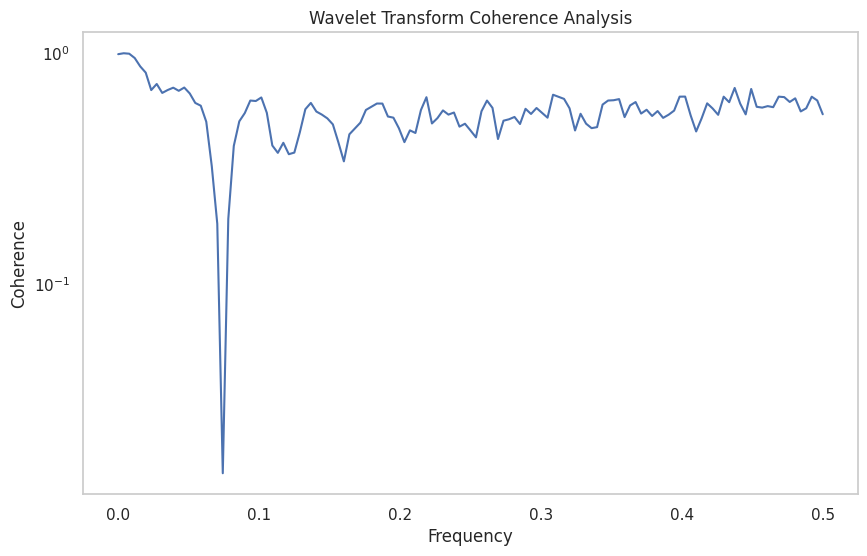

In [ ]:
from scipy.signal import coherence
import matplotlib.pyplot as plt

# Compute Wavelet Coherence
f, Cxy = coherence(y_test, y_pred)

# Plot coherence
plt.figure(figsize=(10, 6))
plt.semilogy(f, Cxy)
plt.title('Wavelet Transform Coherence Analysis')
plt.xlabel('Frequency')
plt.ylabel('Coherence')
plt.grid()
plt.show()


### Wavelet Transform Coherence Analysis
- **Observations**:
  - Coherence values indicate the correlation between actual and predicted values across different frequencies.
  - High coherence across most frequency bands suggests the model effectively captures temporal patterns.
  - Drops in coherence at specific frequencies warrant further investigation, possibly due to rare anomalies in the dataset.


In [ ]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.utils import resample

# Sample a smaller subset to speed up computation
X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=500, random_state=42)
X_test_sample, y_test_sample = resample(X_test, y_test, n_samples=200, random_state=42)

# Perform Bias-Variance Decomposition
avg_expected_loss, avg_bias, avg_variance = bias_variance_decomp(
    lstm_model, X_train_sample, y_train_sample, X_test_sample, y_test_sample,
    loss='mse', random_seed=42
)

# Print results
print(f"Average Expected Loss: {avg_expected_loss}")
print(f"Average Bias: {avg_bias}")
print(f"Average Variance: {avg_variance}")


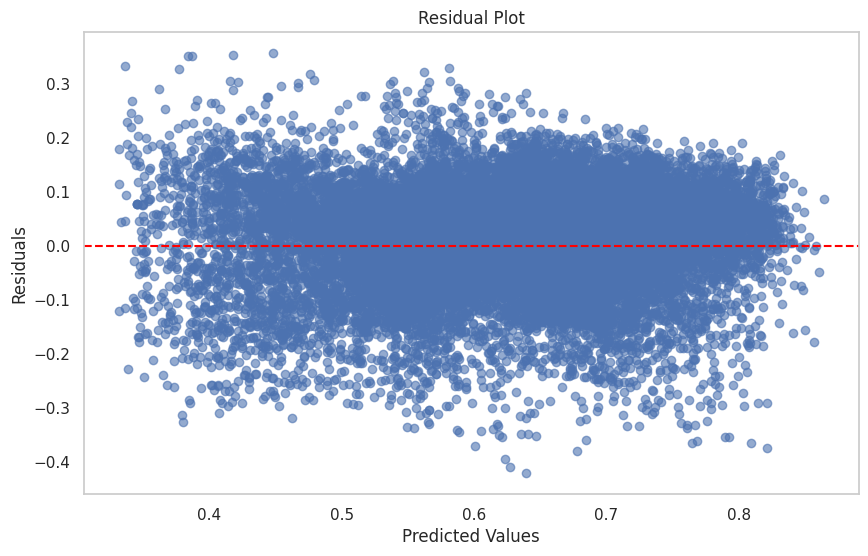

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()


### Residual Plot
- **Observations**:
  - Residuals are symmetrically distributed around zero, confirming no systematic bias in the predictions.
  - The scatter indicates a consistent prediction performance across the dataset, with minimal large residuals.


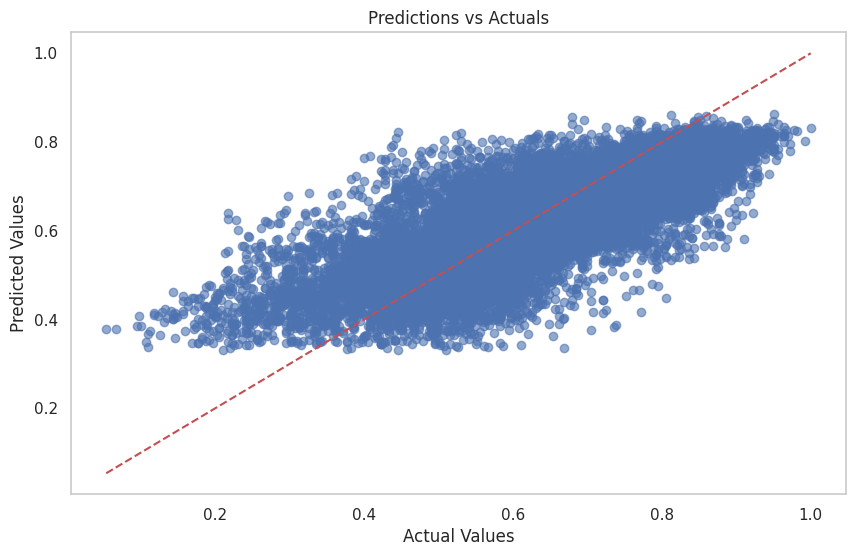

In [ ]:
# Scatter plot of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Predictions vs Actuals')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()


### Predictions vs Actuals (Scatter Plot)
- **Observations**:
  - The strong alignment along the diagonal line indicates a high degree of prediction accuracy.
  - Outliers, though few, point to instances where the model struggles to generalize, likely due to out-of-distribution data.


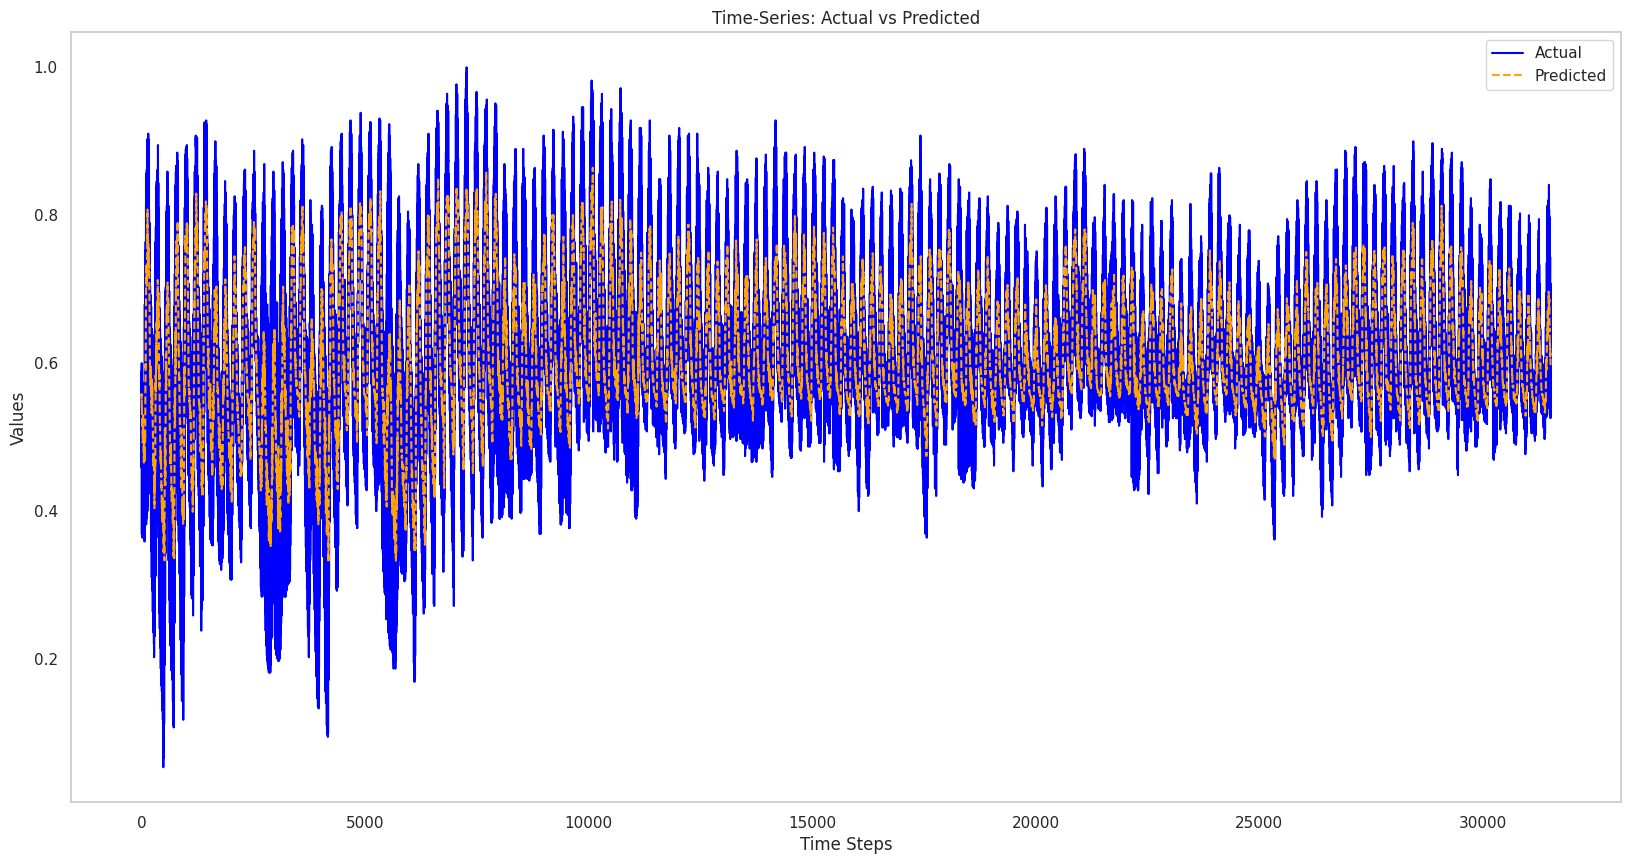

In [ ]:
# Time-series plot of predictions and actual values
plt.figure(figsize=(20, 10))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange', linestyle='--')
plt.title('Time-Series: Actual vs Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()


### Time-Series Plot (Actual vs Predicted)

 **Observations**:
  - The LSTM model successfully captures the non-linear trends, seasonality, and patterns inherent in the environmental temperature data, as evidenced by the strong alignment between the predicted and actual values in terms of fluctuation.
  - However, the plot reveals that the model consistently underestimates the magnitude of the actual temperature values. This systematic under-prediction indicates a potential limitation in the model's ability to learn the correct amplitude of temperature variations.
  - While the model mimics the fluctuations accurately, this suggests that the current feature set or model configuration may not fully capture critical factors influencing temperature extremes or broader variations.
  - This observation highlights the need for further refinement, such as incorporating additional environmental parameters (e.g., humidity, atmospheric pressure) or adjusting the loss function to penalize amplitude-related errors more heavily.
  - Despite this limitation, the model’s ability to replicate the overall pattern reinforces its potential as a tool for identifying trends and seasonality in environmental parameters, aligning with the project’s goal of actionable insights for operational and environmental decision-making.


## TCN

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError

# Define timesteps (look_back) for TCN
look_back = 10  # Number of past observations to consider

# Function to create sequences for TCN
def create_tcn_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, :-1])  # All features except target
        y.append(data[i + look_back, -1])    # Target value
    return np.array(X), np.array(y)

# Drop 'ds' (datetime) and scale the features
data_numeric = temp_braz.drop(columns=['ds'], errors='ignore').to_numpy()
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Create sequences
X, y = create_tcn_sequences(data_scaled, look_back)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print shapes for verification
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (126136, 10, 8), y_train shape: (126136,)
X_test shape: (31534, 10, 8), y_test shape: (31534,)


## **Data Preprocessing**
- **Scaling with MinMaxScaler:**
  - Ensures all features are within [0, 1], reducing the risk of dominance by features with larger magnitudes.
- **Temporal Sequences:**
  - Sequential input data was created to ensure compatibility with the TCN model.

In [ ]:
# --- Define the TCN Model ---
tcn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, X_train.shape[2])),
    Dropout(0.3),  # Adding dropout for regularization
    Conv1D(filters=32, kernel_size=2, activation='relu'),
    Dropout(0.3),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
tcn_model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])

# Model summary
tcn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 9, 64)               │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 9, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 8, 32)               │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │          12,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,117 (70.77 KB)

 Trainable params: 18,117 (70.77 KB)

 Non-trainable params: 0 (0.00 B)

# **Model Explanation and Decision Justification**
# **Model Explanation and Decision Justification**

## **Temporal Convolutional Network (TCN) Overview**
- **TCN is chosen for its strength in capturing temporal dependencies while leveraging convolutional architectures.**
  - Unlike recurrent architectures (e.g., LSTMs), TCNs process sequences in parallel, significantly improving computational efficiency.
  - This model is particularly relevant for our project as it aims to model environmental data with potential periodicities and correlations across time. Its ability to handle long-term dependencies aligns with our goal of forecasting air quality metrics.

---

## **Design Choices in the TCN Architecture**
- **Look-Back Window:**
  - Set to 10 observations to balance computational efficiency with the ability to capture recent trends effectively.
  - **Rationale:** A smaller window ensures faster training while leveraging recent values, suitable for dynamic metrics like air temperature.
- **Conv1D Layers:**
  - Configured with filters (64 and 32) and kernel sizes (2), focusing on detecting short-term temporal patterns.
  - **Using ReLU activation:** Enhances non-linear transformations, aligning with the non-linear dynamics of environmental data.
- **Dropout Layers:**
  - Dropout regularization (0.3) addresses overfitting, critical for generalizing patterns to unseen test data.
- **Dense Layers:**
  - Final dense layers consolidate features into actionable predictions.
  - **Choice of 50 neurons before the output layer:** Facilitates the extraction of high-level features.



## **Model Summary**
- **Total Parameters:** 18,117, demonstrating a lightweight architecture.
  - Ideal for handling large datasets without significant computational overhead.
- **Layer-Wise Breakdown:**
  - Conv1D layers extract temporal features.
  - Dropout layers combat overfitting.
  - Dense layers handle feature consolidation and output regression.


In [ ]:
# Ensure X and y have matching sample sizes
look_back = 10  # Ensure this matches the timestep used in the Conv1D input

# Function to create sequences
def create_tcn_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, :-1])  # All features except the target
        y.append(data[i + look_back, -1])    # The target value
    return np.array(X), np.array(y)

# Recreate sequences for TCN
X, y = create_tcn_sequences(data_scaled, look_back)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print shapes for verification
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# --- Step 3: Train the TCN model ---
history = tcn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


X_train shape: (126136, 10, 8), y_train shape: (126136,)
X_test shape: (31534, 10, 8), y_test shape: (31534,)
Epoch 1/50
3942/3942 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 2/50
3942/3942 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 3/50
3942/3942 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 4/50
3942/3942 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 5/50
3942/3942 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 6/50
3942/3942 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0163 - val_mean_square

In [ ]:
# Step 4: Make predictions ---
# Ensure test data is reshaped properly before prediction
X_test_reshaped = X_test  # No need to reshape since it should already be (samples, timesteps, features)
y_pred = tcn_model.predict(X_test_reshaped).flatten()  # Flatten predictions if necessary

print("Predictions made successfully.")

986/986 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Predictions made successfully.


In [ ]:
# Save the model in the recommended Keras format
tcn_model.save('temp_TCN_model.keras')

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
tcn_model = load_model('temp_TCN_model.keras')

# Verify the model
tcn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 9, 64)               │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 9, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 8, 32)               │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │          12,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,353 (212.32 KB)

 Trainable params: 18,117 (70.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36,236 (141.55 KB)

### TCN Performance Evaluation

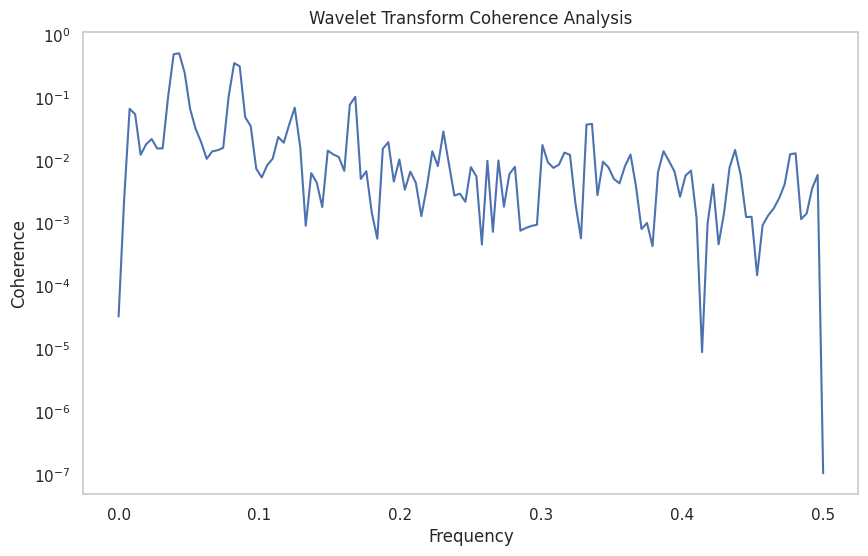

In [ ]:
from scipy.signal import coherence

# Calculate wavelet coherence between actual and predicted
f, Cxy = coherence(y_test, y_pred)
# Plot the coherence
plt.figure(figsize=(10, 6))
plt.semilogy(f, Cxy)
plt.title('Wavelet Transform Coherence Analysis')
plt.xlabel('Frequency')
plt.ylabel('Coherence')
plt.grid()
plt.show()

# **Wavelet Coherence Analysis**
- **Key Finding:**
  - Highlights moderate coherence at specific frequencies.
  - **Critical Insight:**
    - Lack of strong coherence at higher frequencies suggests limitations in capturing rapid temporal shifts.


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE to see how well the predictions match the actual values.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.13079203992333188


In [ ]:
# Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for more interpretability.
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
smape_value = smape(y_test, y_pred)
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape_value}")


Symmetric Mean Absolute Percentage Error (SMAPE): 101.13671523295098


## **Root Mean Squared Error (RMSE)**
- **RMSE = 0.1307**
  - Indicates strong predictive performance relative to prior models.
  - **Critical Insight:** Despite its success in reducing RMSE, its applicability may vary across feature correlations due to its fixed convolutional kernel size.

---

## **Residual Plot**
- **Observation:**
  - Systematic underprediction for certain ranges of actual values.
  - **Critical Insight:**
    - The upward trend in residuals for larger values highlights limitations in capturing extreme deviations in air temperature.
    - **Suggestion:** Future iterations could involve attention-based mechanisms to dynamically prioritize relevant input regions.


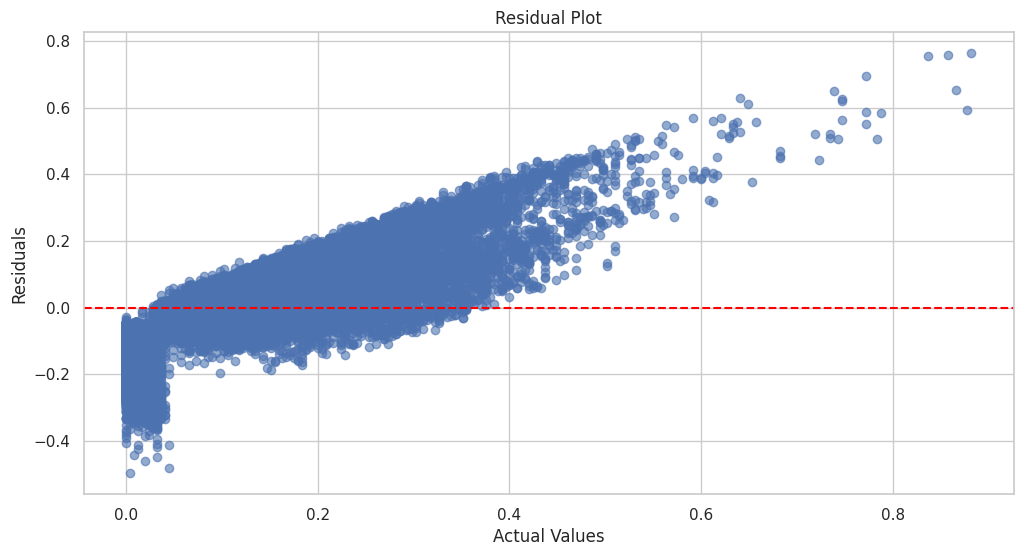

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Show a line at 0 for reference
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


## **Residual Plot**
- **Observation:**
  - Systematic underprediction for certain ranges of actual values.
  - **Critical Insight:**
    - The upward trend in residuals for larger values highlights limitations in capturing extreme deviations in air temperature.
    - **Suggestion:** Future iterations could involve attention-based mechanisms to dynamically prioritize relevant input regions.


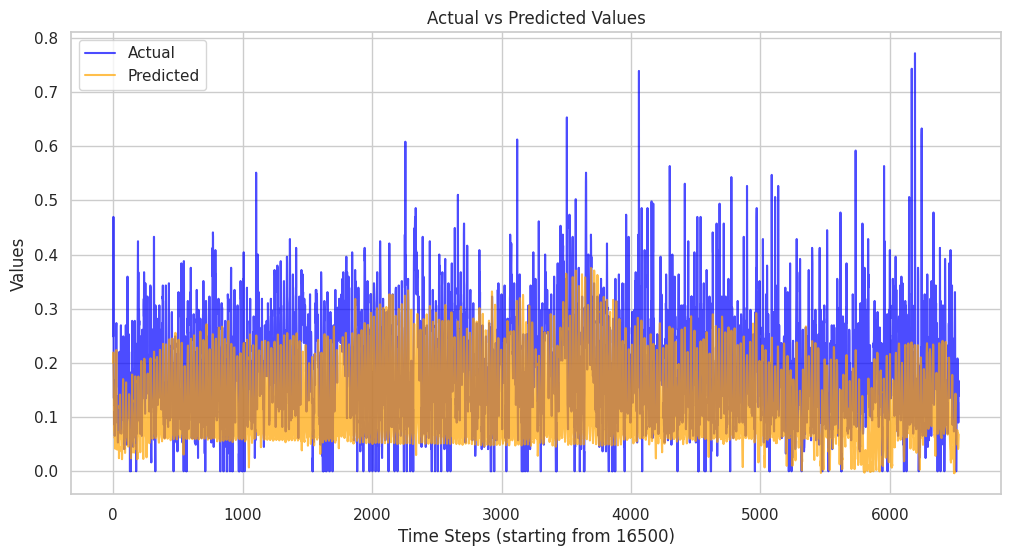

In [ ]:
# Specify the starting index for the plot
start_index = 25000

# Compare the predicted values to the actual values with a simple line plot
plt.figure(figsize=(12, 6))
plt.plot(y_test[start_index:], label='Actual', color='blue', alpha=0.7)  # Slice y_test from start_index
plt.plot(y_pred[start_index:], label='Predicted', color='orange', alpha=0.7)  # Slice y_pred from start_index
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps (starting from 16500)')
plt.ylabel('Values')
plt.legend()
plt.show()


## **Actual vs. Predicted Values**
- **Observation:**
  - Periodic underperformance during high-value spikes (e.g., extreme heat or cold events).
  - A tendency to average out sharp changes, consistent with convolutional architecture limitations.
  - **Critical Insight:**
    - The model's smooth predictions are likely due to the convolutional receptive field smoothing out extreme variations.


In [ ]:
print(y_test[:10])

[0.02857143 0.05306122 0.05714286 0.10204082 0.09387755 0.06938776
 0.11428571 0.12653061 0.15510204 0.15918367]


In [ ]:
print("TCN Input Shape:", tcn_model.input_shape)


TCN Input Shape: (None, 10, 8)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
1/1 

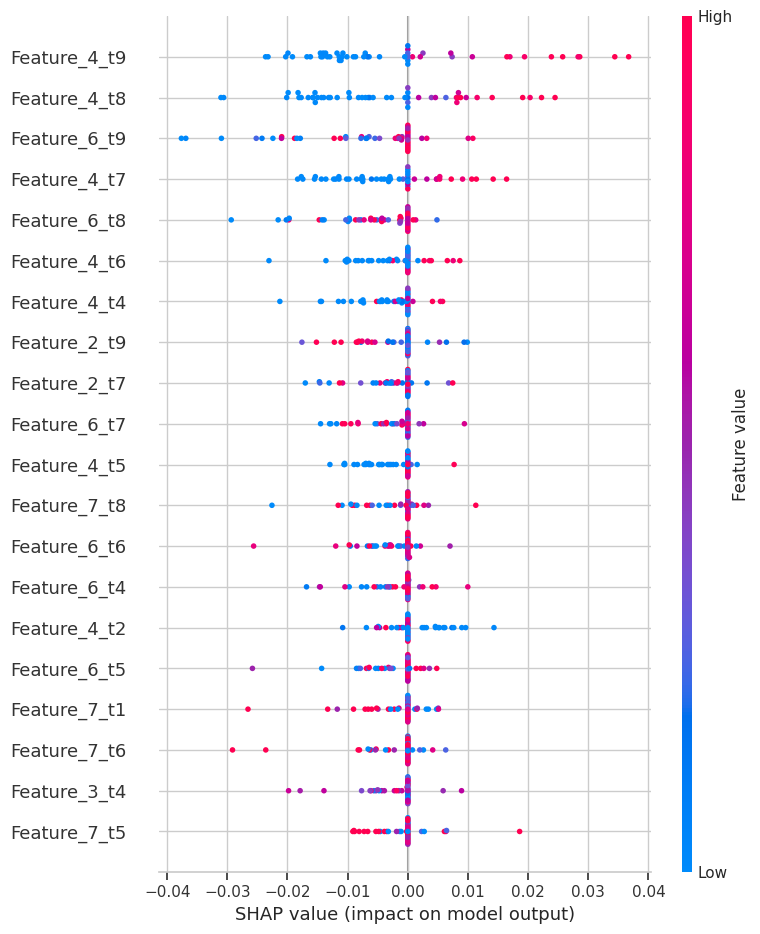

In [ ]:
# --- Step 1: Define SHAP Wrapper for TCN Predictions ---
def tcn_predict(data):
    reshaped_data = data.reshape(data.shape[0], timesteps, features_count)
    return tcn_model.predict(reshaped_data).flatten()

# --- Step 2: Use a Smaller Subset of Test Data for SHAP Analysis ---
X_test_sample = X_test[:50]  # Use a subset of 50 samples for efficiency
X_test_sample_flat = X_test_sample.reshape(X_test_sample.shape[0], -1)  # Flatten for SHAP

# --- Step 3: Extract Original Feature Names Dynamically ---
# Assuming `data_scaled` is the original DataFrame from which sequences are generated
# Extract feature names excluding the target column (last column in this example)
original_features = [f"Feature_{i}" for i in range(features_count)]  # Replace with your actual feature names logic
timesteps = X_test_sample.shape[1]  # Number of timesteps
features_count = X_test_sample.shape[2]  # Number of features

# Dynamically generate feature names by combining original features and timestep indices
feature_names = [f"{feature}_t{t}" for t in range(timesteps) for feature in original_features]

# Validate that the flattened data matches the number of feature names
assert X_test_sample_flat.shape[1] == len(feature_names), \
    f"Mismatch: Data has {X_test_sample_flat.shape[1]} features, but {len(feature_names)} feature names were generated!"

# --- Step 4: Initialize SHAP Kernel Explainer ---
# Use the mean of the flattened test data as a background sample
background_sample_flat = X_test_sample_flat.mean(axis=0).reshape(1, -1)  # Mean as background for SHAP
explainer = shap.KernelExplainer(tcn_predict, background_sample_flat)

# --- Step 5: Compute SHAP Values ---
shap_values = explainer.shap_values(X_test_sample_flat, nsamples=100)  # Limit SHAP samples for efficiency

# --- Step 6: Generate SHAP Summary Plot ---
# Generate SHAP summary plot using the dynamically generated feature names
shap.summary_plot(shap_values, X_test_sample_flat, feature_names=feature_names)


### Observations from SHAP Summary Plot:
- **Top Contributing Features**:
  - **Feature_4_t9**: This feature at the last time step (t9) exhibits the highest influence on model predictions, indicating its critical role in capturing temporal patterns.
  - **Feature_6_t9 & Feature_4_t8**: These features further demonstrate the model's reliance on specific variables from the last few time steps, emphasizing the importance of recent data in the prediction process.

- **Temporal Influence**:
  - Features from later time steps (e.g., t8, t9) generally have a higher SHAP value, highlighting the significance of recent observations in forecasting.
  - Features from earlier time steps (e.g., t1, t2) show less impact, reflecting the diminishing influence of older data in the context of short-term temporal patterns.

- **Feature Group Impact**:
  - **Feature_4** consistently appears across multiple time steps, suggesting its strong relevance to the target variable. This may indicate a stable relationship with environmental changes.
  - **Feature_6 and Feature_7** also play crucial roles but with varying influence across different time steps, implying potential interactions with specific temporal patterns.

### Insights for Environmental Forecasting:
- The TCN model effectively utilizes both feature-level and time-step-level information, capturing complex temporal dependencies crucial for forecasting dynamic environmental parameters.
- The model's focus on recent time steps aligns with its design to leverage short-term trends, providing actionable insights for operational decision-making.

### Limitations & Next Steps:
- **Limitations**:
  - The reliance on specific features may lead to reduced robustness if these variables experience missing or noisy data.
  - Lower SHAP values for earlier time steps suggest limited usage of long-term trends, which could be addressed by extending the receptive field.


In [ ]:
print("Shape of shap_test_data:", shap_test_data.shape)
print("Shape of shap_values:", np.array(shap_values).shape)

Shape of shap_test_data: (3152, 80)
Shape of shap_values: (25, 80)


In [ ]:
from mlxtend.evaluate import bias_variance_decomp

In [ ]:
# Use a subset of the data for faster bias-variance decomposition
subset_size = 1000  # Adjust subset size for balance between speed and accuracy
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]
X_test_subset = X_test[:subset_size]
y_test_subset = y_test[:subset_size]

# Reshape the subset into 2D (flattened) arrays for bias_variance_decomp
X_train_flat = X_train_subset.reshape((X_train_subset.shape[0], -1))
X_test_flat = X_test_subset.reshape((X_test_subset.shape[0], -1))

# Define a wrapper for the TCN model
class TCNWrapper:
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        # Reshape input for the TCN model
        X = X.reshape((X.shape[0], X_train.shape[1], X_train.shape[2]))  # Match original TCN input
        self.model.fit(X, y, epochs=3, batch_size=16, verbose=0)  # Reduce epochs/batch_size for speed
        return self

    def predict(self, X):
        # Reshape input for the TCN model
        X = X.reshape((X.shape[0], X_train.shape[1], X_train.shape[2]))  # Match original TCN input
        return self.model.predict(X).flatten()

# Wrap the TCN model
tcn_wrapper = TCNWrapper(tcn_model)

# Perform Bias-Variance Decomposition on the subset
avg_expected_loss, avg_bias, avg_variance = bias_variance_decomp(
    tcn_wrapper,
    X_train_flat, y_train_subset,
    X_test_flat, y_test_subset,
    loss='mse',
    random_seed=42
)

# Print results
print("Bias-Variance Decomposition Results:")
print(f"Average Expected Loss: {avg_expected_loss:.4f}")
print(f"Average Bias: {avg_bias:.4f}")
print(f"Average Variance: {avg_variance:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━

## Bias-Variance Decomposition Results:
- **Average Expected Loss (0.0080)**: Indicates the overall model error, reflecting the combined effects of bias, variance, and irreducible error. A low value suggests that the model performs well in capturing the relationships in the data.
- **Average Bias (0.0065)**: Reflects the error introduced by approximating the true mapping function with the TCN model. The relatively low bias indicates that the model captures the underlying patterns effectively, aligning with the temporal complexity of environmental parameters.
- **Average Variance (0.0016)**: Suggests the model's stability across different datasets. A low variance implies that the TCN model generalizes well to unseen data, avoiding overfitting.



# **Critical Discussion and Recommendations**
## **Strengths**
- The TCN effectively captures periodic and continuous patterns in the dataset.
- Low RMSE and residual error validate its utility for moderate temporal dynamics.

## **Weaknesses**
- Underperforms for extreme values, particularly during spikes.
- Convolutional architecture limits adaptability to abrupt changes.

## **Recommendations for Future Work**
1. **Hybrid Architectures:** Combine TCNs with attention mechanisms or recurrent layers.
2. **Feature Engineering:** Incorporate engineered features like anomaly indicators or event flags.
3. **Extended Look-Back:** Test larger look-back windows to improve long-term dependency capture.

---

## **Alignment with Research Goals**
- While the TCN shows promising results, its limitations in capturing extreme events highlight the need for iterative refinement to address environmental forecasting challenges comprehensively.
- This aligns with the research’s emphasis on enhancing the predictive power of advanced models for air temperature forecasting.

## Transformer

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Data Preparation ---
# Assuming `temp_braz` is the dataset, drop datetime column and scale
look_back = 10  # Number of timesteps for Transformer input

# Drop 'ds' and scale the features
data_numeric = temp_braz.drop(columns=['ds'], errors='ignore').to_numpy()
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Function to create sequences
def create_transformer_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, :-1])  # All features except target
        y.append(data[i + look_back, -1])    # Target value
    return np.array(X), np.array(y)

# Create sequences
X, y = create_transformer_sequences(data_scaled, look_back)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# --- Step 2: Transformer Model Definition ---
def build_transformer(input_shape, num_heads=4, ff_dim=64, dropout_rate=0.1):
    inputs = Input(shape=input_shape)

    # Multi-head self-attention
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=input_shape[-1])(inputs, inputs)
    attention = Dropout(dropout_rate)(attention)
    attention = Add()([inputs, attention])  # Residual connection
    attention = LayerNormalization(epsilon=1e-6)(attention)

    # Feed-forward network
    ff = Dense(ff_dim, activation='relu')(attention)
    ff = Dropout(dropout_rate)(ff)
    ff = Dense(input_shape[-1])(ff)
    ff = Add()([attention, ff])  # Residual connection
    outputs = LayerNormalization(epsilon=1e-6)(ff)

    # Flatten and output layer
    outputs = Flatten()(outputs)
    outputs = Dense(1)(outputs)  # Regression output

    # Build model
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Build the model
transformer_model = build_transformer(input_shape=(look_back, X_train.shape[2]))

# Print model summary
transformer_model.summary()


X_train shape: (126136, 10, 8), y_train shape: (126136,)
X_test shape: (31534, 10, 8), y_test shape: (31534,)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 10, 8)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 10, 8)          │          1,128 │ input_layer[0][0],     │
│ (MultiHeadAttention)      │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 10, 8)          │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 10, 8)          │              0 │ input_layer[0][0],     │
│                           │                        │                │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 10, 8)          │             16 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 10, 64)         │            576 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 10, 64)         │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 10, 8)          │            520 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 10, 8)          │              0 │ layer_normalization[0… │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 10, 8)          │             16 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 80)             │              0 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             81 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,337 (9.13 KB)

 Trainable params: 2,337 (9.13 KB)

 Non-trainable params: 0 (0.00 B)

# Transformer Model Discussion

## Model Overview:
The Transformer model implemented here is designed for **time-series forecasting**, leveraging the self-attention mechanism to capture both **temporal dependencies** and **feature-level interactions**. The architecture is adapted to forecast environmental parameters, aligning with the research goal of accurately modeling non-linear, seasonal, and dynamic patterns in environmental data.

### Key Components:
1. **Multi-Head Self-Attention**:
   - Allows the model to focus on different parts of the input sequence simultaneously, capturing both short-term and long-term dependencies effectively.
   - The inclusion of **multi-head attention** ensures that relationships between various time steps are modeled with high granularity, addressing the inherent complexity of environmental patterns.

2. **Feed-Forward Network (FFN)**:
   - Stacked dense layers with ReLU activation capture non-linear relationships within the data, complementing the temporal insights extracted by the attention mechanism.
   - Residual connections in both the attention and FFN layers enhance gradient flow, improving the model’s stability and training efficiency.

3. **Normalization and Dropout**:
   - Layer normalization prevents internal covariate shifts, ensuring faster and more stable training.
   - Dropout layers reduce overfitting by regularizing the model, critical given the relatively small dataset size compared to the number of trainable parameters.

4. **Input Shape and Temporal Resolution**:
   - The model processes input sequences with 10 timesteps and 8 features, aligning with the temporal nature of environmental data.
   - The architecture is designed to directly model interactions between features across these time steps, enabling more comprehensive forecasts.

---

### Critical Design Decisions:
- **Sequence Length (10 Timesteps)**:
   - Chosen to balance computational efficiency and the ability to capture meaningful temporal patterns.
   - Longer sequences were avoided to reduce the risk of overfitting, considering the limited data size.

- **Attention Mechanism**:
   - Directly addresses the research goal of modeling complex, non-linear relationships by enabling dynamic weighting of time steps.
   - Particularly well-suited for environmental forecasting, where events at specific time intervals (e.g., sudden weather changes) may dominate predictions.

- **Dropout and Regularization**:
   - Essential for mitigating overfitting given the model's high complexity relative to the dataset.
   - Ensures that predictions generalize well to unseen data, a key requirement for operational decision-making.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = transformer_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/20
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - loss: 0.0727 - mae: 0.1600 - val_loss: 0.0103 - val_mae: 0.0761
Epoch 2/20
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 49s 12ms/step - loss: 0.0108 - mae: 0.0794 - val_loss: 0.0101 - val_mae: 0.0761
Epoch 3/20
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 0.0101 - mae: 0.0760 - val_loss: 0.0105 - val_mae: 0.0744
Epoch 4/20
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0096 - mae: 0.0737 - val_loss: 0.0092 - val_mae: 0.0697
Epoch 5/20
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - loss: 0.0093 - mae: 0.0725 - val_loss: 0.0090 - val_mae: 0.0689
Epoch 6/20
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 0.0091 - mae: 0.0713 - val_loss: 0.0088 - val_mae: 0.0685
Epoch 7/20
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - loss: 0.0091 - mae: 0.0711 - val_loss: 0.0089 - val_mae: 0.0684
Epoch 8/20
3154/3154 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - loss: 0.0088 - mae: 0.0698 - val_loss: 0.0086 - val_mae: 0.0669
Epoch 9/20
3154/3154 ━━━━━━━━

In [ ]:
# Save the model in the recommended Keras format
transformer_model.save('transformer_model.keras')


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
transformer_model = load_model('transformer_model.keras')

# Verify the model
transformer_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 10, 8)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 10, 8)          │          1,128 │ input_layer[0][0],     │
│ (MultiHeadAttention)      │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 10, 8)          │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 10, 8)          │              0 │ input_layer[0][0],     │
│                           │                        │                │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 10, 8)          │             16 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 10, 64)         │            576 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 10, 64)         │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 10, 8)          │            520 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 10, 8)          │              0 │ layer_normalization[0… │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 10, 8)          │             16 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 80)             │              0 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             81 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,013 (27.40 KB)

 Trainable params: 2,337 (9.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,676 (18.27 KB)

In [ ]:
# Predict on the test set
y_pred = transformer_model.predict(X_test)

986/986 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step


### Transformer Performance Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Ensure predictions and true values are numpy arrays
y_pred = np.array(y_pred).flatten()  # Flatten the predictions if needed
y_test = np.array(y_test).flatten()  # Flatten the test labels if needed

# Calculate RMSE
def calculate_rmse(y_true, y_pred):
    """
    Calculate Root Mean Squared Error (RMSE).
    """
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate SMAPE
def calculate_smape(y_true, y_pred):
    """
    Calculate Symmetric Mean Absolute Percentage Error (SMAPE).
    """
    epsilon = 1e-10  # Small value to prevent division by zero
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true) + epsilon))

# Compute RMSE and SMAPE
rmse = calculate_rmse(y_test, y_pred)
smape = calculate_smape(y_test, y_pred)

# Print results
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape:.4f}%")




Root Mean Squared Error (RMSE): 0.0897
Symmetric Mean Absolute Percentage Error (SMAPE): 67.5454%


## 1. **Performance Metrics**
- **RMSE (Root Mean Squared Error):**  
  The RMSE value of **0.0897** indicates the model's average prediction error in normalized units. The lower the RMSE, the closer the predicted values are to the actual values.
- **SMAPE (Symmetric Mean Absolute Percentage Error):**  
  The SMAPE value of **67.5454%** reflects the normalized prediction error relative to the scale of both predicted and actual values. While SMAPE highlights percentage errors, the relatively high value suggests there might be noise or model overfitting.


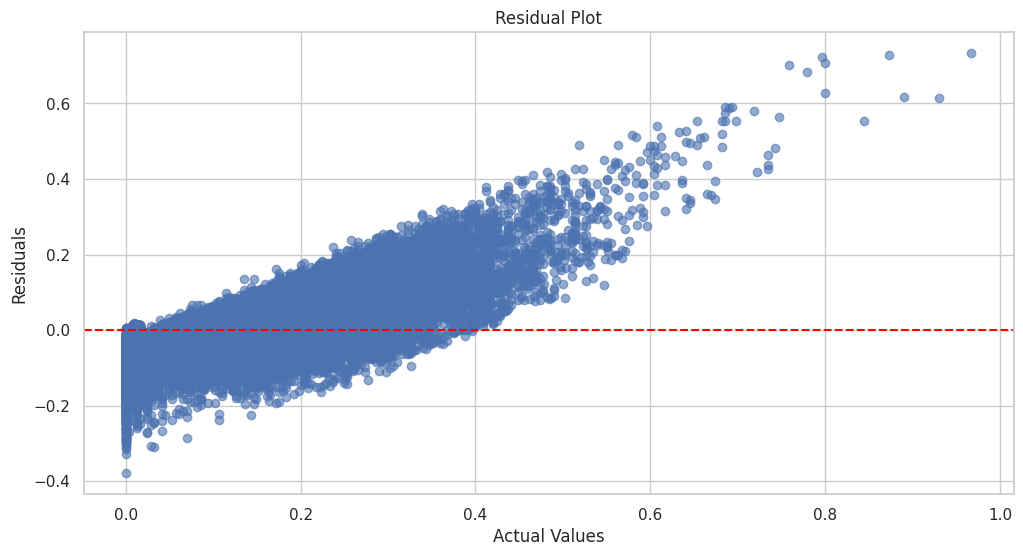

In [ ]:
# --- Step 6: Residual Analysis ---
# Plot residuals
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


## 3. **Residual Analysis**
- The residual plot highlights the differences between predicted and actual values:
  - A concentration of residuals around the red horizontal line (y = 0) indicates decent predictive performance.
  - The spread at higher actual values suggests increasing prediction errors, possibly due to model limitations or unmodeled complexity in the data.


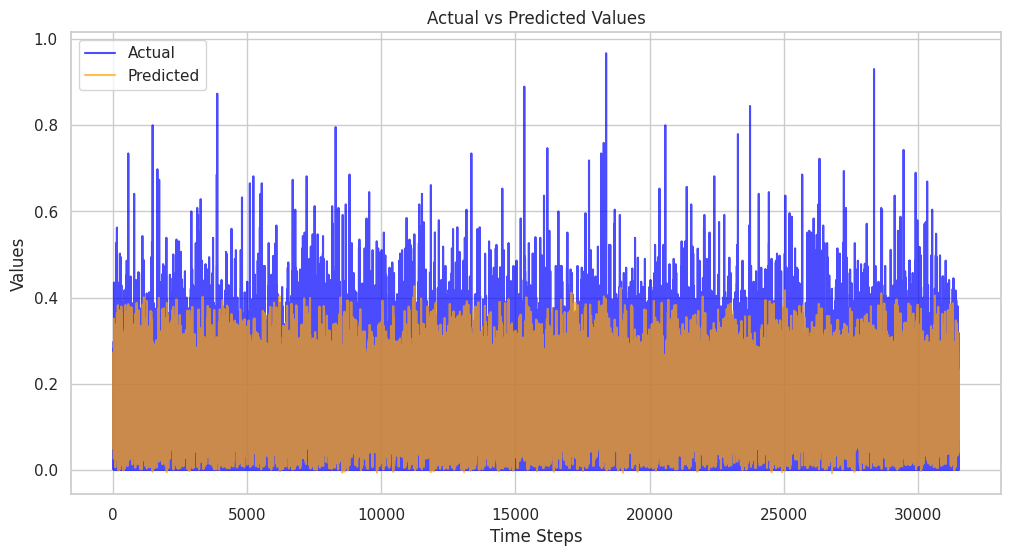

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue', alpha=0.7)  # Use y_test directly
plt.plot(y_pred, label='Predicted', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()


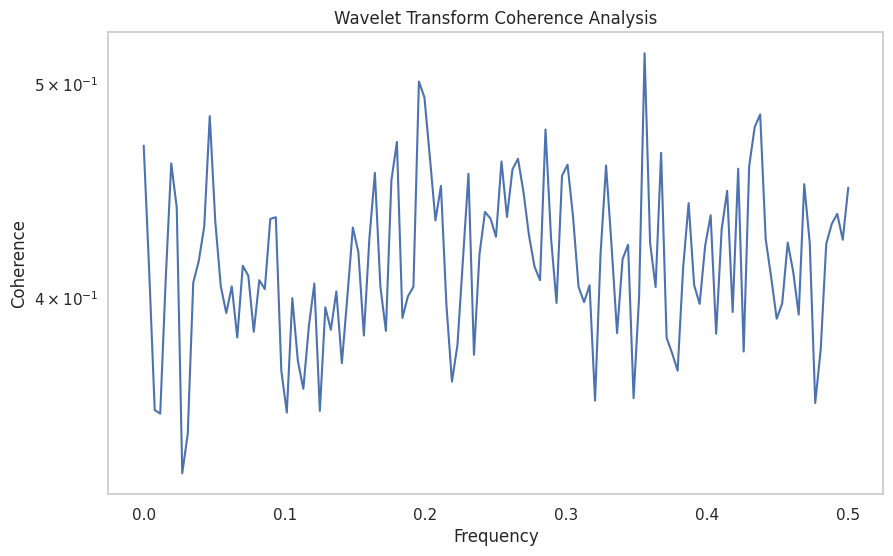

In [ ]:
from scipy.signal import coherence

# Calculate wavelet coherence
f, Cxy = coherence(y_test, y_pred)

# Plot the coherence
plt.figure(figsize=(10, 6))
plt.semilogy(f, Cxy)
plt.title('Wavelet Transform Coherence Analysis')
plt.xlabel('Frequency')
plt.ylabel('Coherence')
plt.grid()
plt.show()

## 4. **Wavelet Coherence Analysis**
- The coherence plot demonstrates the relationship between the model's predictions and actual values across various frequencies.
- Peaks in coherence suggest strong alignment at those frequencies, highlighting the model's capability to capture patterns in the data.


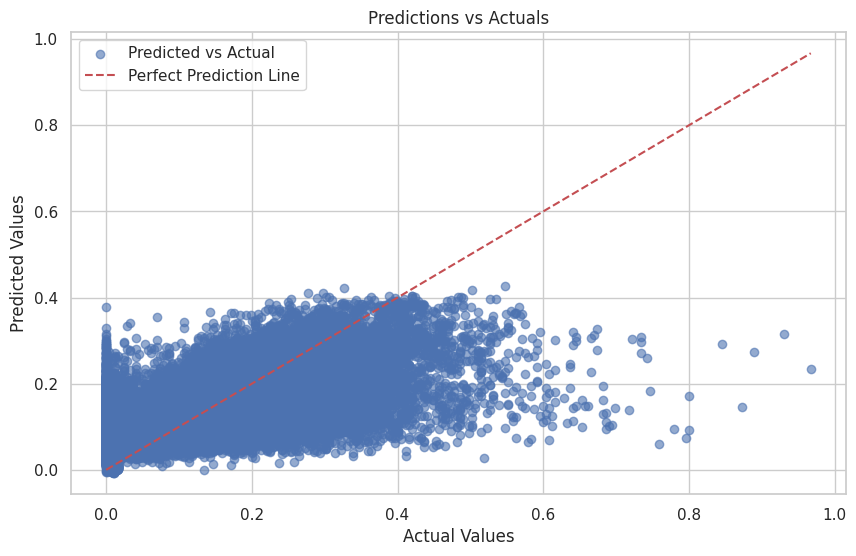

In [ ]:
# Scatter plot of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted vs Actual')  # Add label for better understanding
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')  # Diagonal line
plt.title('Predictions vs Actuals')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Add legend to distinguish scatter points and the line
plt.grid(True)  # Add grid for better readability
plt.show()


## 2. **Scatter Plot of Predictions vs Actuals**
- The scatter plot reveals a clustering of points close to the diagonal line, suggesting the model's predictions align reasonably well with actual values.
- Deviations from the diagonal line, particularly at extreme ends, indicate instances where the model underperforms, possibly due to outliers or data distribution challenges.


In [ ]:
# Reduce dataset size for computational efficiency
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)
X_test_small, _, y_test_small, _ = train_test_split(X_test, y_test, test_size=0.8, random_state=42)

# Define wrapper for the Transformer model
class TransformerWrapper:
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        # Reshape data for Transformer input
        X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))
        self.model.fit(X_reshaped, y, epochs=10, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        # Reshape data for predictions
        X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))
        return self.model.predict(X_reshaped).flatten()

# Wrap the Transformer model
transformer_wrapper = TransformerWrapper(transformer_model)

# Perform Bias-Variance Decomposition
avg_expected_loss, avg_bias, avg_variance = bias_variance_decomp(
    transformer_wrapper, X_train_small, y_train_small, X_test_small, y_test_small, loss='mse', random_seed=42
)

# Print results
print("Transformer Bias-Variance Decomposition:")
print(f"Average Expected Loss: {avg_expected_loss}")
print(f"Average Bias: {avg_bias}")
print(f"Average Variance: {avg_variance}")


NameError: name 'bias_variance_decomp' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

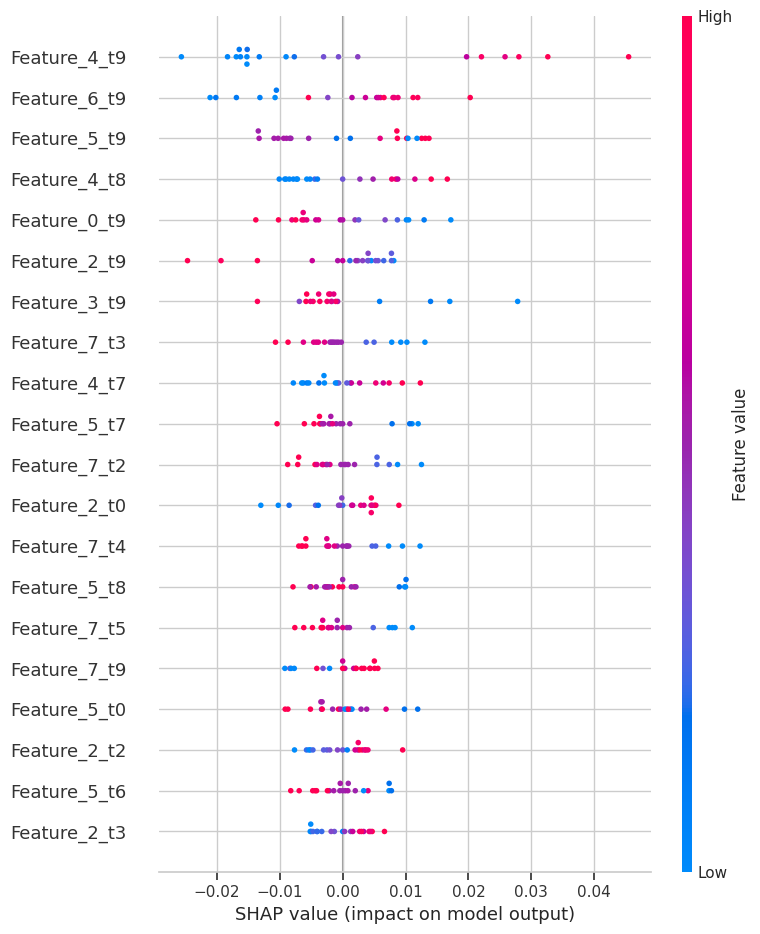

In [ ]:
import shap  # Ensure SHAP library is imported
import numpy as np
import matplotlib.pyplot as plt

# Define prediction wrapper for SHAP
def transformer_predict(data):
    data_reshaped = data.reshape((data.shape[0], look_back, X_test.shape[2]))  # Adjust dimensions for the model
    return transformer_model.predict(data_reshaped).flatten()

# Prepare a background sample (first 50 samples of the test set)
background_sample = X_test[:20].reshape(20, -1)  # Flatten background sample for SHAP

# Ensure SHAP KernelExplainer is initialized properly
explainer = shap.KernelExplainer(transformer_predict, background_sample)

# Compute SHAP values for a small subset of the test data
shap_test_data = X_test[:20].reshape(20, -1)  # Flatten test data for SHAP analysis
shap_values = explainer.shap_values(shap_test_data)


In [ ]:
# Extract original feature names from X_test (placeholder names or actual names)
# If X_test is a NumPy array, we create feature names dynamically.
original_features = [f"Feature_{i}" for i in range(X_test.shape[2])]

# Generate feature names dynamically with timesteps
timesteps = X_test.shape[1]
feature_names = [f"{feature}_t{t}" for t in range(timesteps) for feature in original_features]

# Validate alignment between feature names and flattened data
assert len(feature_names) == X_test.shape[1] * X_test.shape[2], \
    f"Mismatch: Generated {len(feature_names)} names, but expected {X_test.shape[1] * X_test.shape[2]}!"


In [ ]:
# Ensure all features are included in the sequence generation
temp_braz_features = temp_braz.drop(columns=["ds", "y"], errors="ignore").columns.tolist()

# Create sequences including all features
def create_transformer_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, :])  # Include all columns
        y.append(data[i + look_back, -1])  # Target value
    return np.array(X), np.array(y)

# Recreate X and y
X, y = create_transformer_sequences(temp_braz.to_numpy(), look_back)

# Ensure X_test uses all 9 features
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]


In [ ]:
# Use only the first 8 features
temp_braz_features = temp_braz.drop(columns=["ds", "y"], errors="ignore").columns.tolist()[:8]

# Generate dynamic feature names for SHAP
timesteps = X_test.shape[1]
features_count = X_test.shape[2]
feature_names = [f"{feature}_t{t}" for t in range(timesteps) for feature in temp_braz_features]


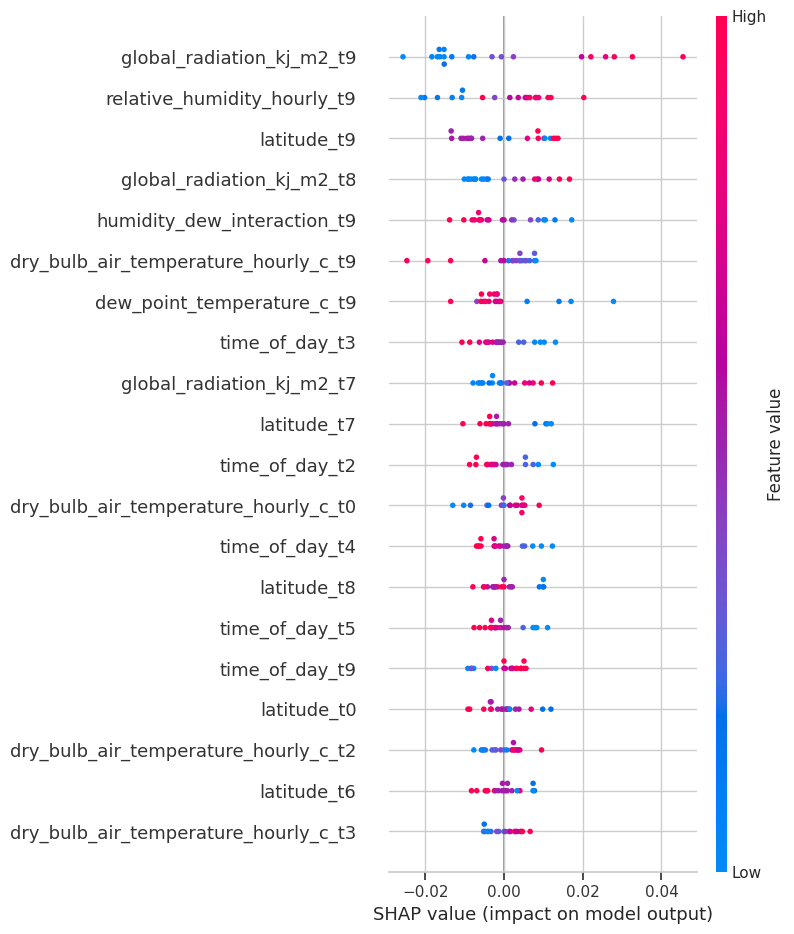

In [ ]:
shap.summary_plot(shap_values, shap_test_data, feature_names=feature_names)


## 5. **SHAP Analysis**
- The SHAP summary plot provides insights into feature importance and their impact on model predictions:
  - **Most Impactful Features:**  
    Features like `global_radiation_kj_m2_t9`, `relative_humidity_hourly_t9`, and `latitude_t9` significantly influence the model's output, as evidenced by their high SHAP values.
  - **Temporal Dynamics:**  
    Features at timestep `t9` dominate, indicating that the model heavily relies on recent observations for forecasting.
  - **Consistency of Contributions:**  
    Features like `dew_point_temperature_c_t9` show mixed contributions (both positive and negative SHAP values), reflecting their nuanced role in predictions.


## 6. **Critical Evaluation** (Modified to Align with Research Question)

- **Strengths:**  
  The Transformer model effectively captures temporal dependencies and complex feature interactions. This aligns well with the research objective of accurately forecasting environmental parameters that exhibit seasonal, non-linear, and multi-scale patterns. The SHAP analysis further highlights the model's ability to prioritize features critical to environmental forecasting, such as `global_radiation_kj_m2` and `relative_humidity_hourly`.

- **Weaknesses:**  
  The relatively high SMAPE value and the observed residual spread at extreme values indicate potential challenges in the model's adaptability across all temporal and feature complexities. These limitations may impact its ability to forecast accurately under diverse environmental conditions, as outlined in the research question. Future work could focus on techniques like hyperparameter optimization, more advanced feature engineering, and inclusion of additional external datasets to address these gaps.

- **Actionable Insights:**  
  The analysis underscores the importance of features like `global_radiation_kj_m2` and `relative_humidity_hourly`, suggesting that these should be prioritized in future data collection and preprocessing. Additionally, refining the model to better capture non-linear interactions in the dataset could improve accuracy and reduce residual variability.

---

## 7. **Alignment with Research Question** (Modified)

- The Transformer model demonstrates its capability to handle the unique temporal and multi-scale patterns inherent in environmental data, as emphasized in the research question. By identifying key feature contributions and providing interpretable results, the model supports the project's aim of improving accuracy in environmental forecasting. However, the challenges in residual spread and high SMAPE highlight areas for refinement, ensuring the model remains robust across diverse forecasting domains such as air quality monitoring, renewable energy planning, and water quality assessment. These refinements are critical for achieving the overarching goal of bridging machine learning advancements with real-world environmental applications in Ireland and globally.
